In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
#from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system

In [2]:
BankData = pd.read_csv("bank-full.csv") # loading the data

BankData.head(10)

age           job   marital  education default  balance housing loan  \
0   58    management   married   tertiary      no     2143     yes   no   
1   44    technician    single  secondary      no       29     yes   no   
2   33  entrepreneur   married  secondary      no        2     yes  yes   
3   47   blue-collar   married    unknown      no     1506     yes   no   
4   33       unknown    single    unknown      no        1      no   no   
5   35    management   married   tertiary      no      231     yes   no   
6   28    management    single   tertiary      no      447     yes  yes   
7   42  entrepreneur  divorced   tertiary     yes        2     yes   no   
8   58       retired   married    primary      no      121     yes   no   
9   43    technician    single  secondary      no      593     yes   no   

   contact  day month  duration  campaign  pdays  previous poutcome Target  
0  unknown    5   may       261         1     -1         0  unknown     no  
1  unknown    5   may       151         1     -1         0  unknown     no  
2  unknown    5   may        76         1     -1         0  unknown     no  
3  unknown    5   may        92         1     -1         0  unknown     no  
4  unknown    5   may       198         1     -1         0  unknown     no  
5  unknown    5   may       139         1     -1         0  unknown     no  
6  unknown    5   may       217         1     -1         0  unknown     no  
7  unknown    5   may       380         1     -1         0  unknown     no  
8  unknown    5   may        50         1     -1         0  unknown     no  
9  unknown    5   may        55         1     -1         0  unknown     no

** insights**
data model is distributed with numerical, categorical and continous data. pdays looks to have -ve values. contact an poutcome has many unknown. should check if they are missing/unbalanced values.

In [3]:
BankData.shape

(45211, 17)

In [4]:
BankData.describe()

age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

*** Insights ***

By looking at the mean, std, all the data looks good, except balance and pdays have negative values.

Mean of Age is 40. So avg age of customers is 40. Min age is 18 and max age is 95.

min balance is -8019. and max is 10217. By looking at the mean, looks like many customers are with less balance.
day has been distributed throughout the month.
 h
pdays min is -1 and max is 871. even 75% has -1. so most customers have not been contacted.


In [5]:
BankData.info()# checking datatypes. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
# there are many columns with object data type. Need to convert them into catagorical type.

for feature in BankData.columns: # Loop through all columns in the dataframe
    if BankData[feature].dtype == 'object': # Only apply for columns with categorical strings
        BankData[feature] = pd.Categorical(BankData[feature])# Replace strings with an integer
BankData.head(10)

age           job   marital  education default  balance housing loan  \
0   58    management   married   tertiary      no     2143     yes   no   
1   44    technician    single  secondary      no       29     yes   no   
2   33  entrepreneur   married  secondary      no        2     yes  yes   
3   47   blue-collar   married    unknown      no     1506     yes   no   
4   33       unknown    single    unknown      no        1      no   no   
5   35    management   married   tertiary      no      231     yes   no   
6   28    management    single   tertiary      no      447     yes  yes   
7   42  entrepreneur  divorced   tertiary     yes        2     yes   no   
8   58       retired   married    primary      no      121     yes   no   
9   43    technician    single  secondary      no      593     yes   no   

   contact  day month  duration  campaign  pdays  previous poutcome Target  
0  unknown    5   may       261         1     -1         0  unknown     no  
1  unknown    5   may       151         1     -1         0  unknown     no  
2  unknown    5   may        76         1     -1         0  unknown     no  
3  unknown    5   may        92         1     -1         0  unknown     no  
4  unknown    5   may       198         1     -1         0  unknown     no  
5  unknown    5   may       139         1     -1         0  unknown     no  
6  unknown    5   may       217         1     -1         0  unknown     no  
7  unknown    5   may       380         1     -1         0  unknown     no  
8  unknown    5   may        50         1     -1         0  unknown     no  
9  unknown    5   may        55         1     -1         0  unknown     no

In [7]:
BankData.describe(include=['category']) # checking describe statistics on categorical columns.

job  marital  education default housing   loan   contact  \
count         45211    45211      45211   45211   45211  45211     45211   
unique           12        3          4       2       2      2         3   
top     blue-collar  married  secondary      no     yes     no  cellular   
freq           9732    27214      23202   44396   25130  37967     29285   

        month poutcome Target  
count   45211    45211  45211  
unique     12        4      2  
top       may  unknown     no  
freq    13766    36959  39922

** insights **
month is distrubuted throughout the year.
married and secondary customers are more. most customers have cellular contact.
And most of the target customers has 'No' that means most customers havent taken term deposit.

In [8]:
for column in BankData.columns:
    print(BankData[column].value_counts())
    
    # printing the value counts to see how data is distributed w.r.t categorial and continous.

32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
90       2
92       2
93       2
95       2
94       1
Name: age, Length: 77, dtype: int64
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
no     44396
yes      815
Name: default, dtype: int64
0        3514
1         195
2         156
4         139
3         134
         ... 
4305        1
6352        1
18881       1
14889       1
7218        1
Name: balance, Length: 7168, dtype: int64
yes    25130
no     20081
Name: housing, dtype: int64
no     37967
yes     7244
Name: loan, dtype: int64
cellular    

# Irregular value analysis
Checking for  Missing Values / Outliers

In [9]:
BankData.isna()

# checking if there are any null values in the data.

age    job  marital  education  default  balance  housing   loan  \
0      False  False    False      False    False    False    False  False   
1      False  False    False      False    False    False    False  False   
2      False  False    False      False    False    False    False  False   
3      False  False    False      False    False    False    False  False   
4      False  False    False      False    False    False    False  False   
...      ...    ...      ...        ...      ...      ...      ...    ...   
45206  False  False    False      False    False    False    False  False   
45207  False  False    False      False    False    False    False  False   
45208  False  False    False      False    False    False    False  False   
45209  False  False    False      False    False    False    False  False   
45210  False  False    False      False    False    False    False  False   

       contact    day  month  duration  campaign  pdays  previous  poutcome  \
0        False  False  False     False     False  False     False     False   
1        False  False  False     False     False  False     False     False   
2        False  False  False     False     False  False     False     False   
3        False  False  False     False     False  False     False     False   
4        False  False  False     False     False  False     False     False   
...        ...    ...    ...       ...       ...    ...       ...       ...   
45206    False  False  False     False     False  False     False     False   
45207    False  False  False     False     False  False     False     False   
45208    False  False  False     False     False  False     False     False   
45209    False  False  False     False     False  False     False     False   
45210    False  False  False     False     False  False     False     False   

       Target  
0       False  
1       False  
2       False  
3       False  
4       False  
...       ...  
45206   False  
45207   False  
45208   False  
45209   False  
45210   False  

[45211 rows x 17 columns]

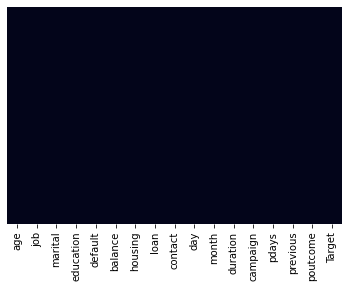

In [10]:
sns.heatmap(BankData.isna(),yticklabels=False,cbar=False) # checking for missed values using heatmap


In [11]:
copydata = BankData.copy()
def chk(x):
    if x<0:
        return np.NaN
    else:
        return x
    
copydata["balance"] = copydata["balance"].apply(chk)
copydata["pdays"] = copydata["pdays"].apply(chk)



# changed negative values to NAN to see how much -ve data is present in the model and then verifying with heatmap

In [12]:
copydata

age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no   2143.0     yes   no   
1       44    technician    single  secondary      no     29.0     yes   no   
2       33  entrepreneur   married  secondary      no      2.0     yes  yes   
3       47   blue-collar   married    unknown      no   1506.0     yes   no   
4       33       unknown    single    unknown      no      1.0      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no    825.0      no   no   
45207   71       retired  divorced    primary      no   1729.0      no   no   
45208   72       retired   married  secondary      no   5715.0      no   no   
45209   57   blue-collar   married  secondary      no    668.0      no   no   
45210   37  entrepreneur   married  secondary      no   2971.0      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome  \
0        unknown    5   may       261         1    NaN         0  unknown   
1        unknown    5   may       151         1    NaN         0  unknown   
2        unknown    5   may        76         1    NaN         0  unknown   
3        unknown    5   may        92         1    NaN         0  unknown   
4        unknown    5   may       198         1    NaN         0  unknown   
...          ...  ...   ...       ...       ...    ...       ...      ...   
45206   cellular   17   nov       977         3    NaN         0  unknown   
45207   cellular   17   nov       456         2    NaN         0  unknown   
45208   cellular   17   nov      1127         5  184.0         3  success   
45209  telephone   17   nov       508         4    NaN         0  unknown   
45210   cellular   17   nov       361         2  188.0        11    other   

      Target  
0         no  
1         no  
2         no  
3         no  
4         no  
...      ...  
45206    yes  
45207    yes  
45208    yes  
45209     no  
45210     no  

[45211 rows x 17 columns]

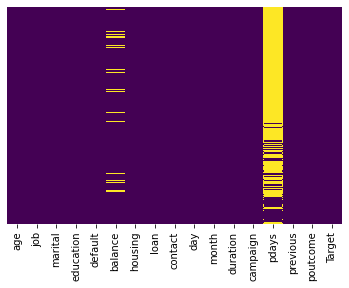

In [13]:
sns.heatmap(copydata.isna(),yticklabels=False,cbar=False,cmap='viridis')


There are no missing values in the data, but balance and pdays hav negative values.
But according the problem statement, pdays hav -1 value for the  person has not been contacted. So no need to change the value.
Assuming some of the customers have negative bank balance.
Hence leaving balance also as it is.

In [14]:
#Finding the categorical columns to get value counts of them
categorical_columns=[col for col in BankData.columns if BankData[col].nunique()<=5]
print(categorical_columns)
countable_columns =[col for col in BankData.columns if BankData[col].nunique()>5]
print(countable_columns)

['marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome', 'Target']
['age', 'job', 'balance', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous']


In [15]:
# value counts of categorical columns
for col in categorical_columns:
    print(BankData[col].value_counts())
    print('\n')

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64


secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64


no     44396
yes      815
Name: default, dtype: int64


yes    25130
no     20081
Name: housing, dtype: int64


no     37967
yes     7244
Name: loan, dtype: int64


cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64


unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64


no     39922
yes     5289
Name: Target, dtype: int64




# Univariate 

continous columns: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

categorical columns : ['marital', job, month 'education', 'default', 'housing', 'loan', 'contact', 'poutcome', 'Target']

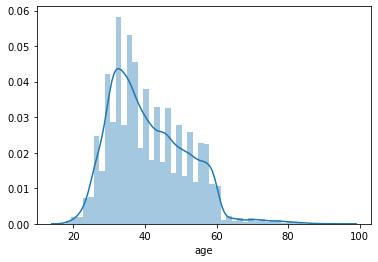

In [16]:
sns.distplot(BankData.age)

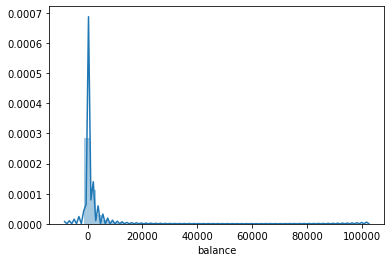

In [17]:
sns.distplot(BankData.balance)

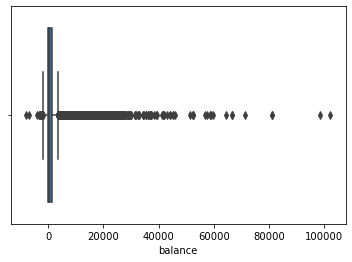

In [18]:
sns.boxplot(BankData.balance)

**insights**
Graph shows there are outliers in th balance data. But as it is balance of customers, sometimes there are chances that some customers have higher balance comparitely with others. So better stay like that without changing outliers.

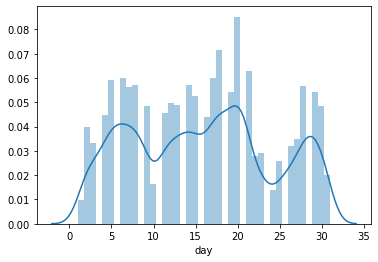

In [19]:
sns.distplot(BankData.day)

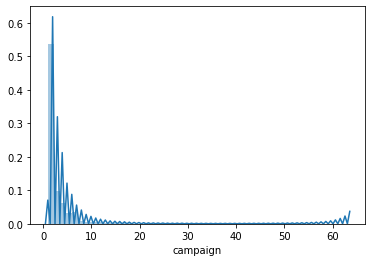

In [20]:
sns.distplot(BankData.campaign)

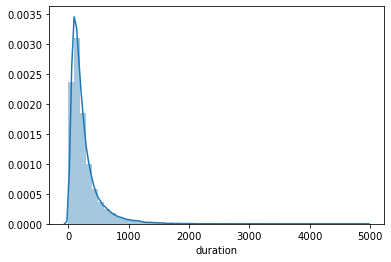

In [21]:
sns.distplot(BankData.duration)

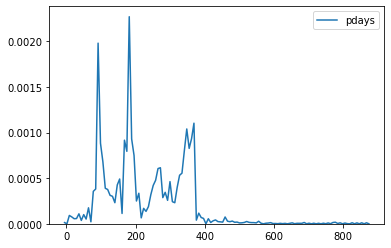

In [22]:
sns.kdeplot(BankData.pdays,bw = 1.5)

C:\Users\srisi\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


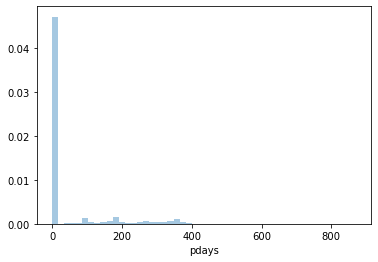

In [23]:
sns.distplot(BankData.pdays)

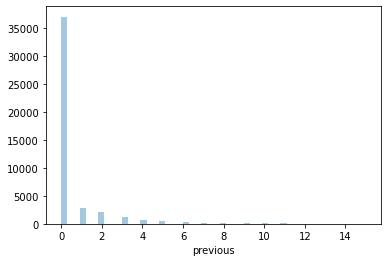

In [24]:
sns.distplot(BankData.previous, kde =False, hist_kws={"range": [0,15]})

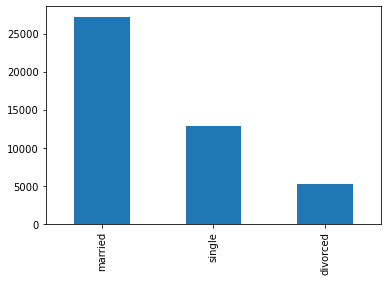

In [25]:
BankData.marital.value_counts().plot.bar()


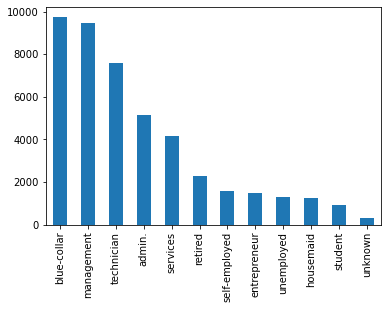

In [26]:
BankData.job.value_counts().plot.bar()


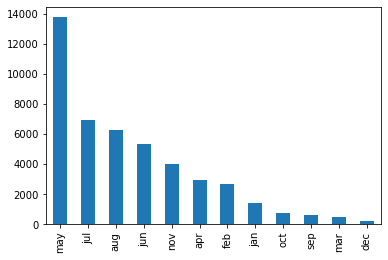

In [27]:
BankData.month.value_counts().plot.bar()


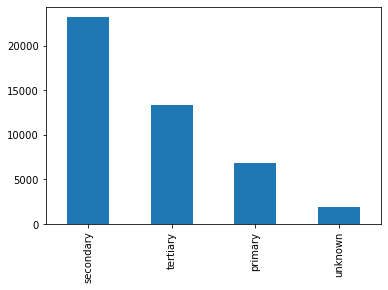

In [28]:
BankData.education.value_counts().plot.bar()


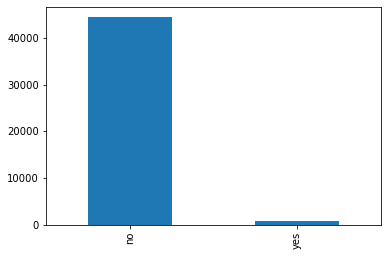

In [29]:
BankData.default.value_counts().plot.bar()


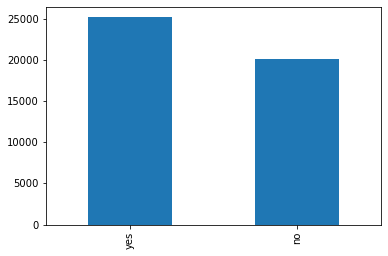

In [30]:
BankData.housing.value_counts().plot.bar()


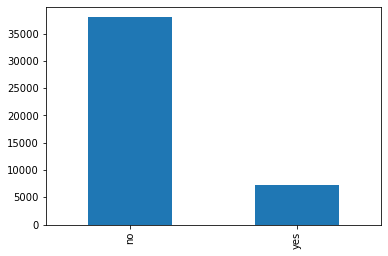

In [31]:
BankData.loan.value_counts().plot.bar()


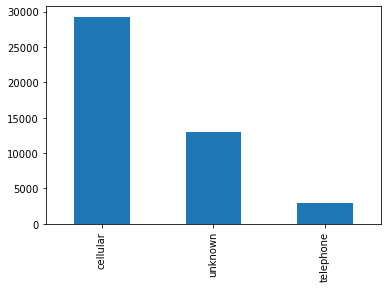

In [32]:
BankData.contact.value_counts().plot.bar()


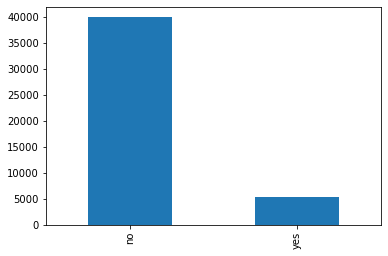

In [33]:
BankData.Target.value_counts().plot.bar()


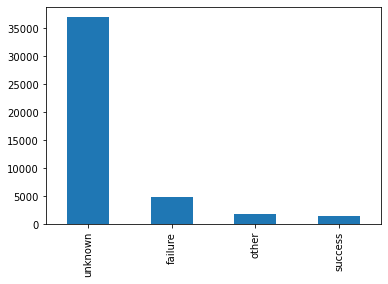

In [34]:
BankData.poutcome.value_counts().plot.bar()


*** Insights ***

 Age is uniformily distributed.  Majority of customers are between 30 and 60.
Plot from balance shows that most of the customers have 0 balance which means many of them ight not be interested in subscribing for deposits.  And there are many outliers from 50k to 100k

Day is uniformly distributed.
Campaign is high between 0 to 20. Suggests that number of contacts performed during campaign is arnd 20. It is highly skewed.

Duration is also highly skewed. 
Pdays is highly skewed and seems to have lot of outliers.

Married customers who have the bank account are higher than single and divorced.

Customers with blue collar job are higher. There are few unknown job customers. Could be missing values. 
May month seems to have more frequency compared to all the other months. Jun, July , August
Also hav good frequencies. Sept oct dec have less number, implies that customers are not keen to take deposit during those months.

Customers with secondary education are more than tertiary and primary. There are some unknown values.

Default No is very high. Customers with personal loan are very less compared to with loan.

There is no much difference between Customers with housing loan and without housing loan.

pOutcome on unknown is higher. Should look into this.


# Bivariate analysis


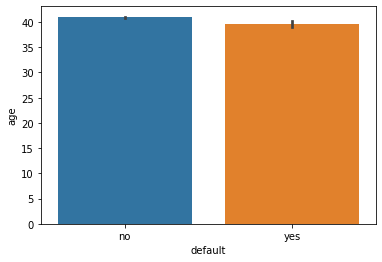

In [35]:
sns.barplot(y=BankData['age'],x=BankData['default'])

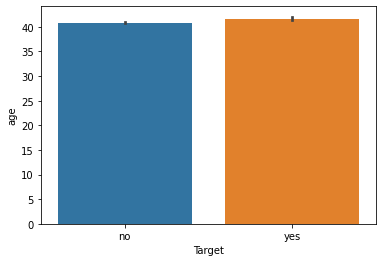

In [36]:
sns.barplot(y=BankData['age'],x=BankData['Target'])

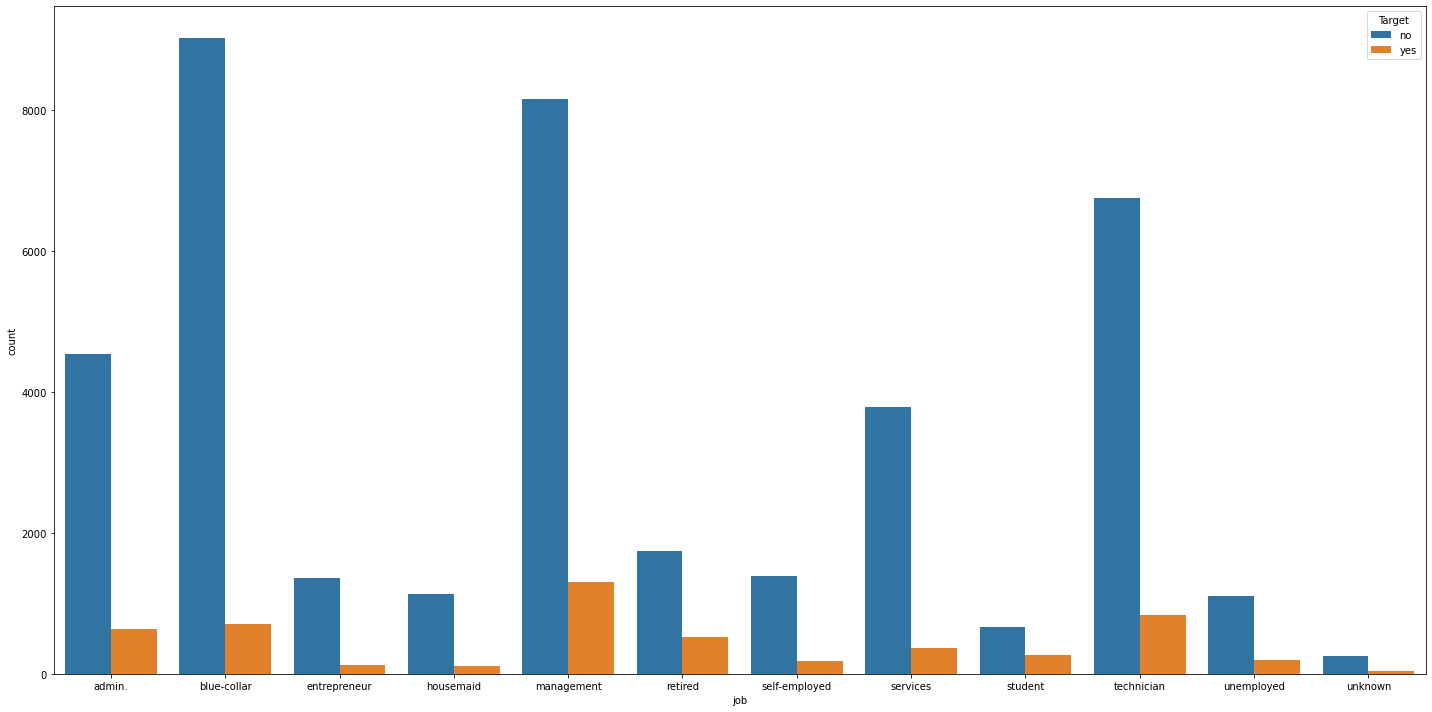

In [37]:
plt.figure(figsize=(20,10))
sns.countplot(BankData.job, hue = "Target", data=BankData)
plt.tight_layout()

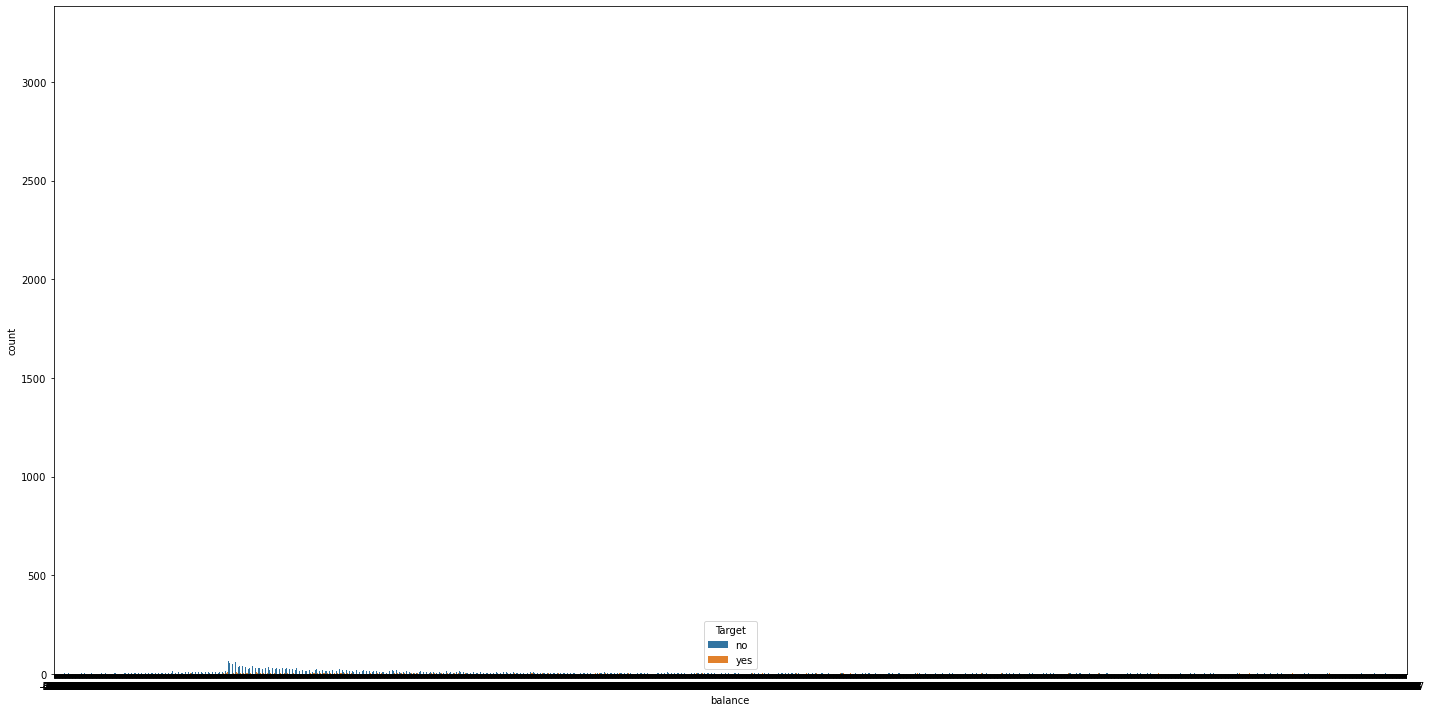

In [38]:
plt.figure(figsize=(20,10))
sns.countplot(BankData.balance, hue = "Target", data=BankData)
plt.tight_layout()



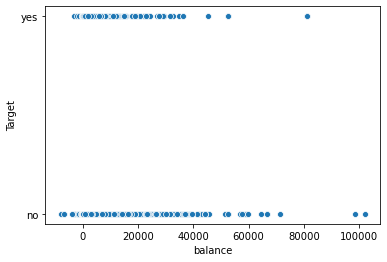

In [39]:
sns.scatterplot(BankData.balance, BankData.Target)

countplot for balance and target is not clear, hence used scatter plot to get clear picture of their relation.

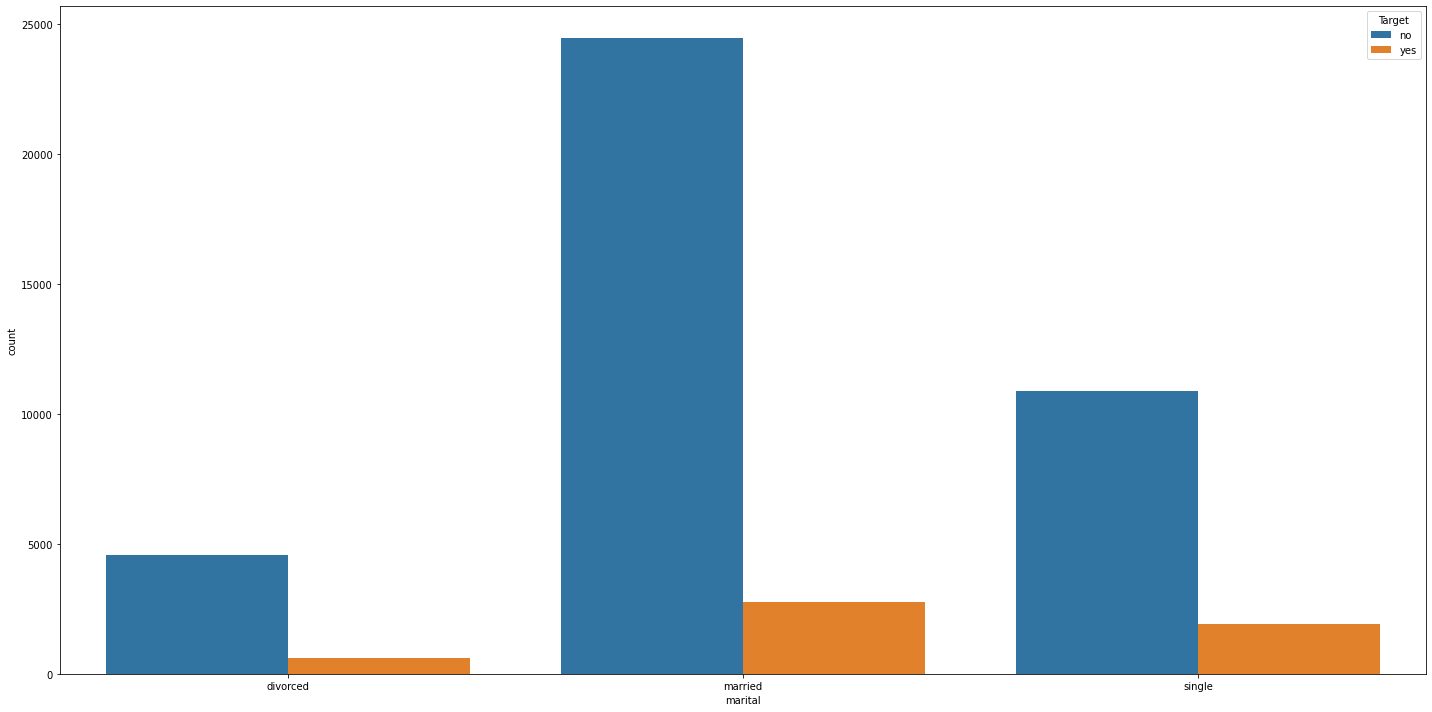

In [40]:
plt.figure(figsize=(20,10))
sns.countplot(BankData.marital, hue = "Target", data=BankData)
plt.tight_layout()

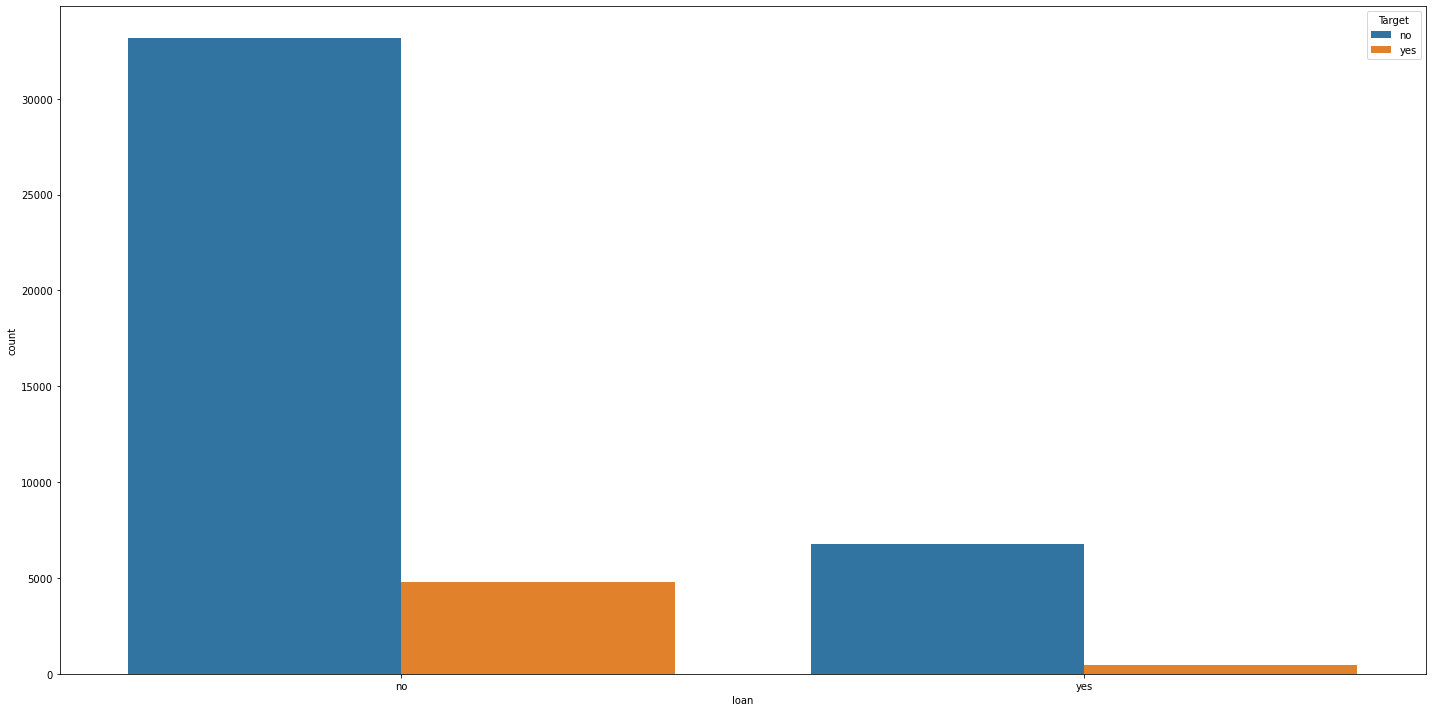

In [41]:

plt.figure(figsize=(20,10))
sns.countplot(BankData.loan, hue = "Target", data=BankData)
plt.tight_layout()

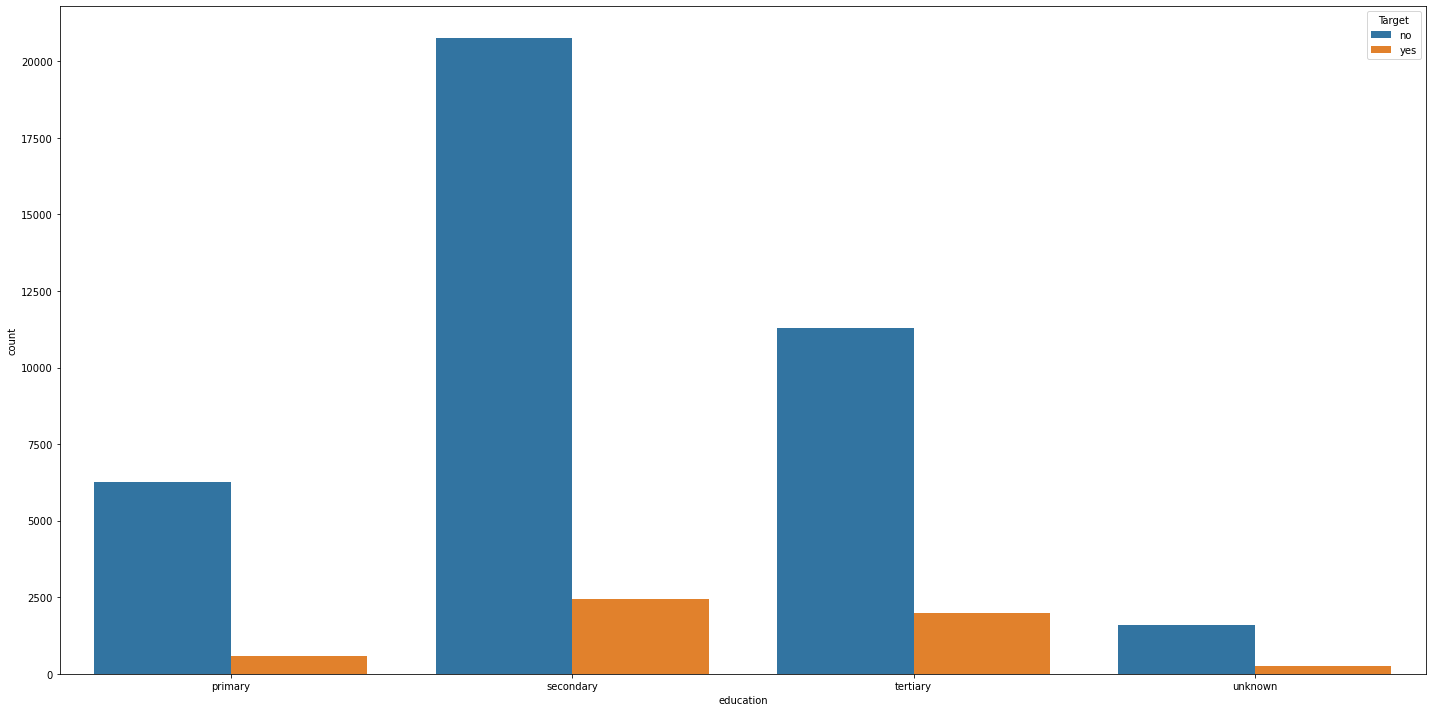

In [42]:
plt.figure(figsize=(20,10))
sns.countplot(BankData.education, hue = "Target", data=BankData)
plt.tight_layout()

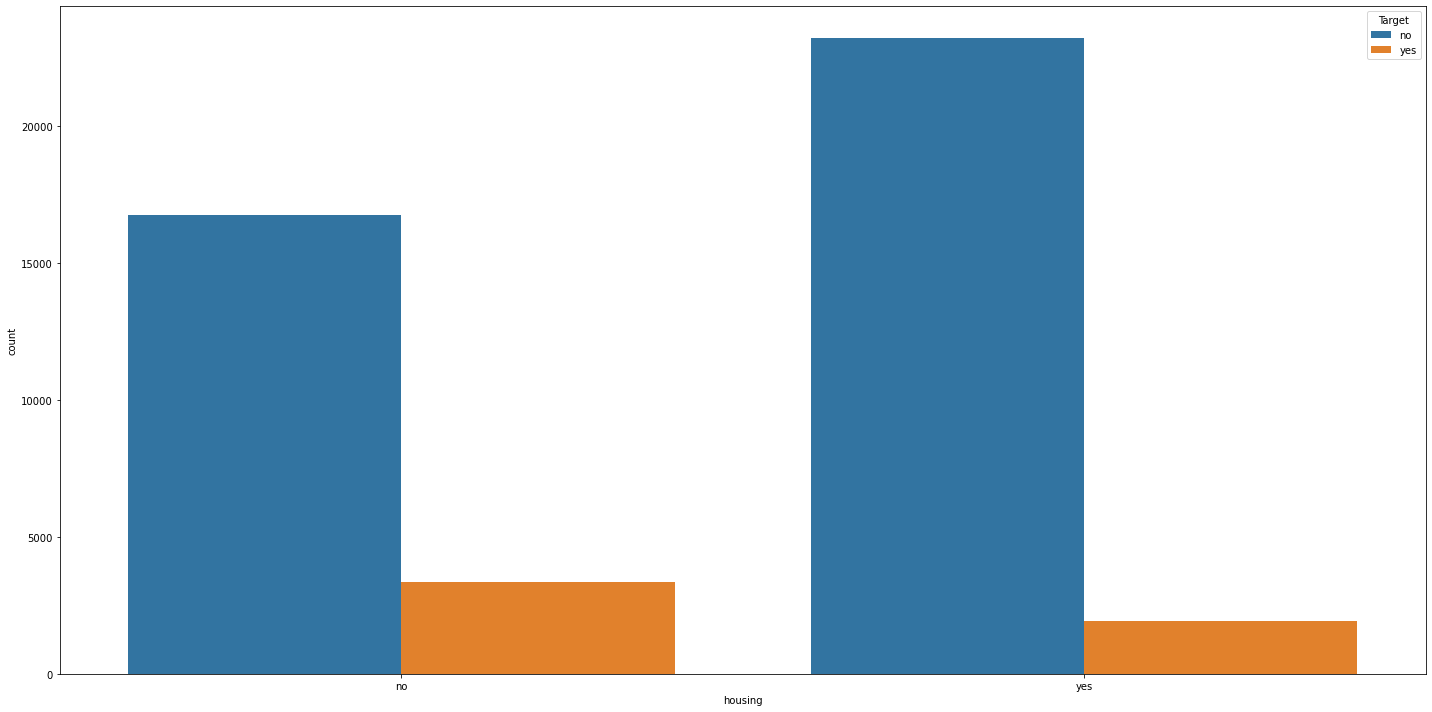

In [43]:
plt.figure(figsize=(20,10))
sns.countplot(BankData.housing, hue = "Target", data=BankData)
plt.tight_layout()

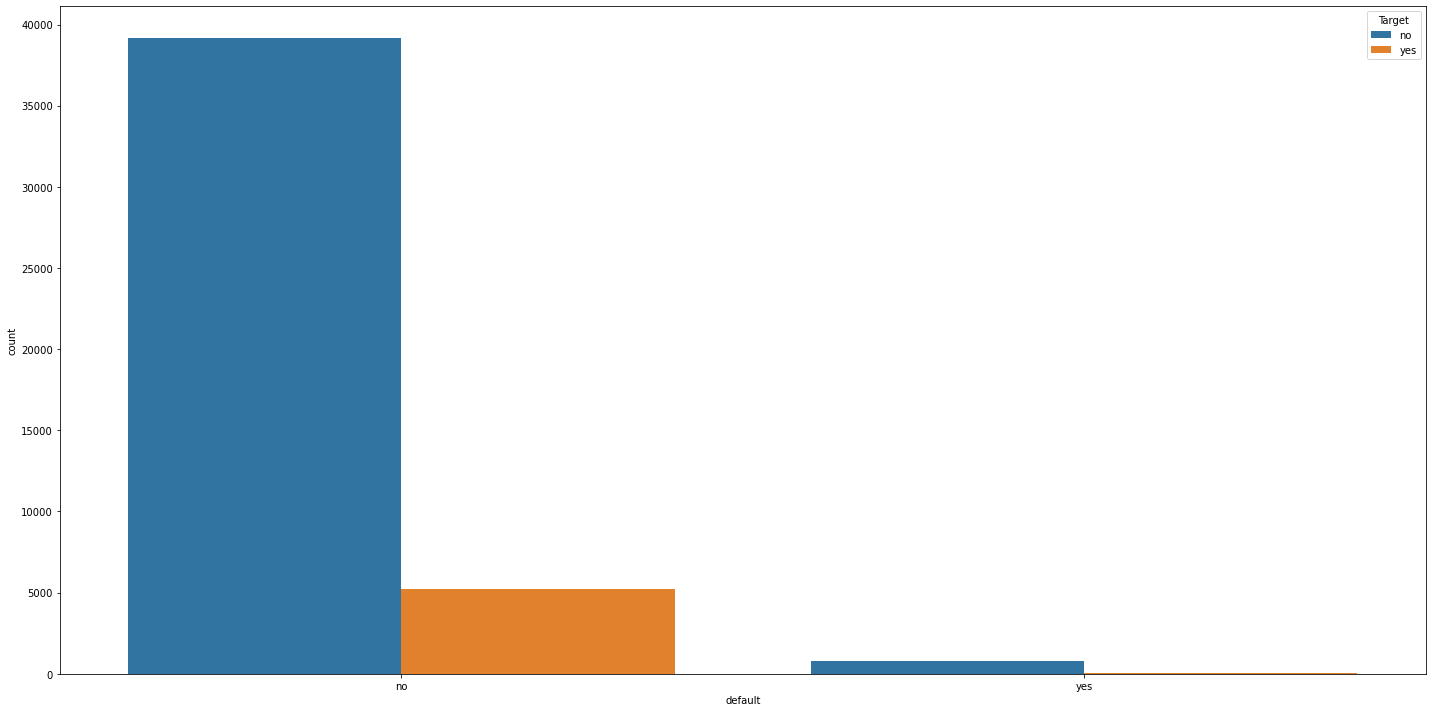

In [44]:
plt.figure(figsize=(20,10))
sns.countplot(BankData.default, hue = "Target", data=BankData)
plt.tight_layout()

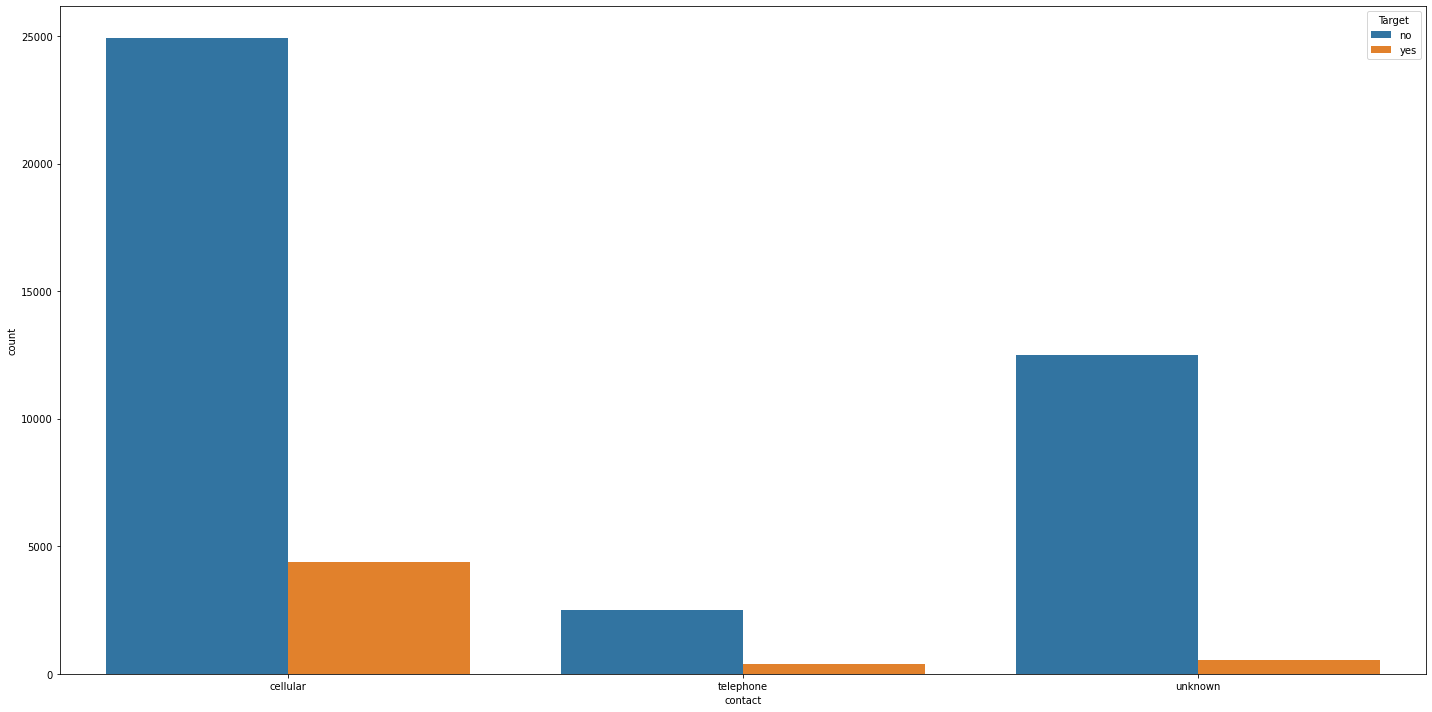

In [45]:
plt.figure(figsize=(20,10))
sns.countplot(BankData.contact, hue = "Target", data=BankData)
plt.tight_layout()

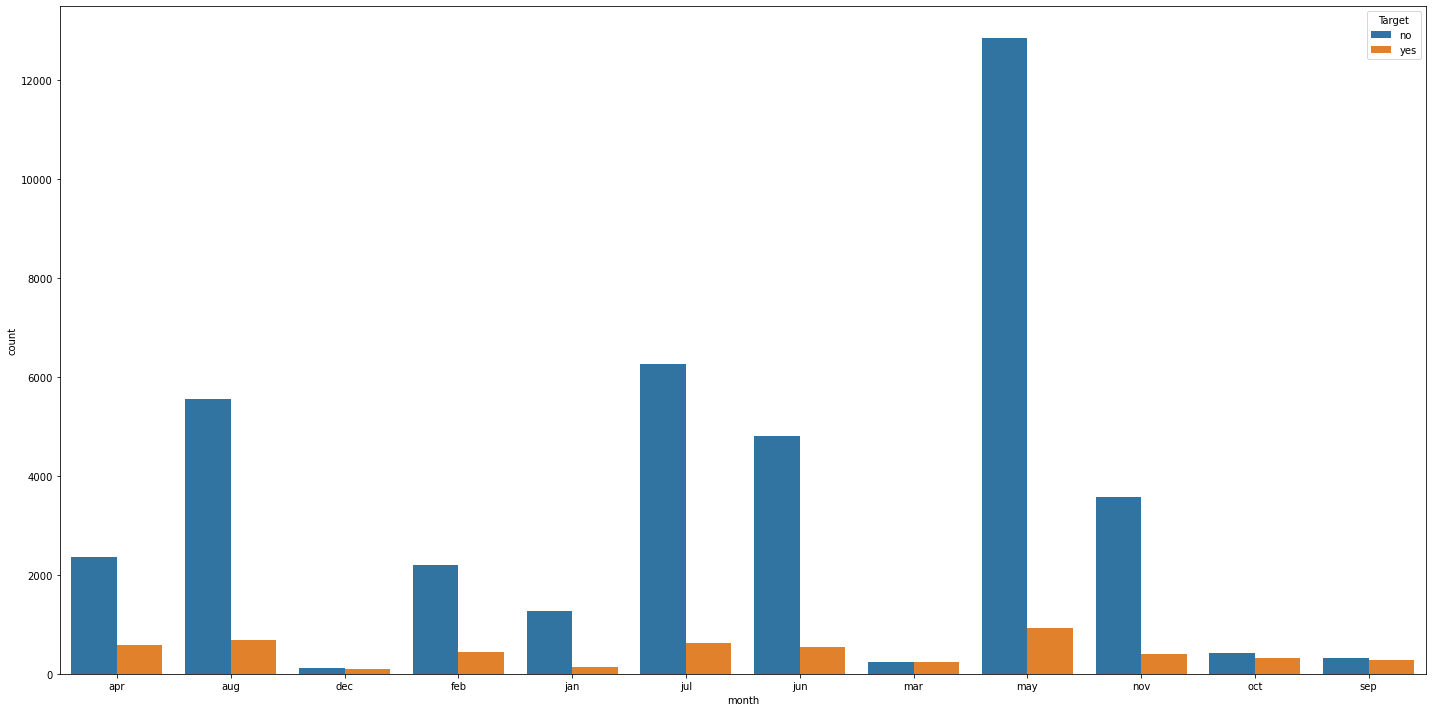

In [46]:
plt.figure(figsize=(20,10))
sns.countplot(BankData.month, hue = "Target", data=BankData)
plt.tight_layout()

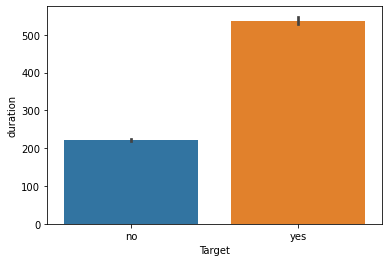

In [47]:
sns.barplot(y=BankData.duration,x=BankData.Target)

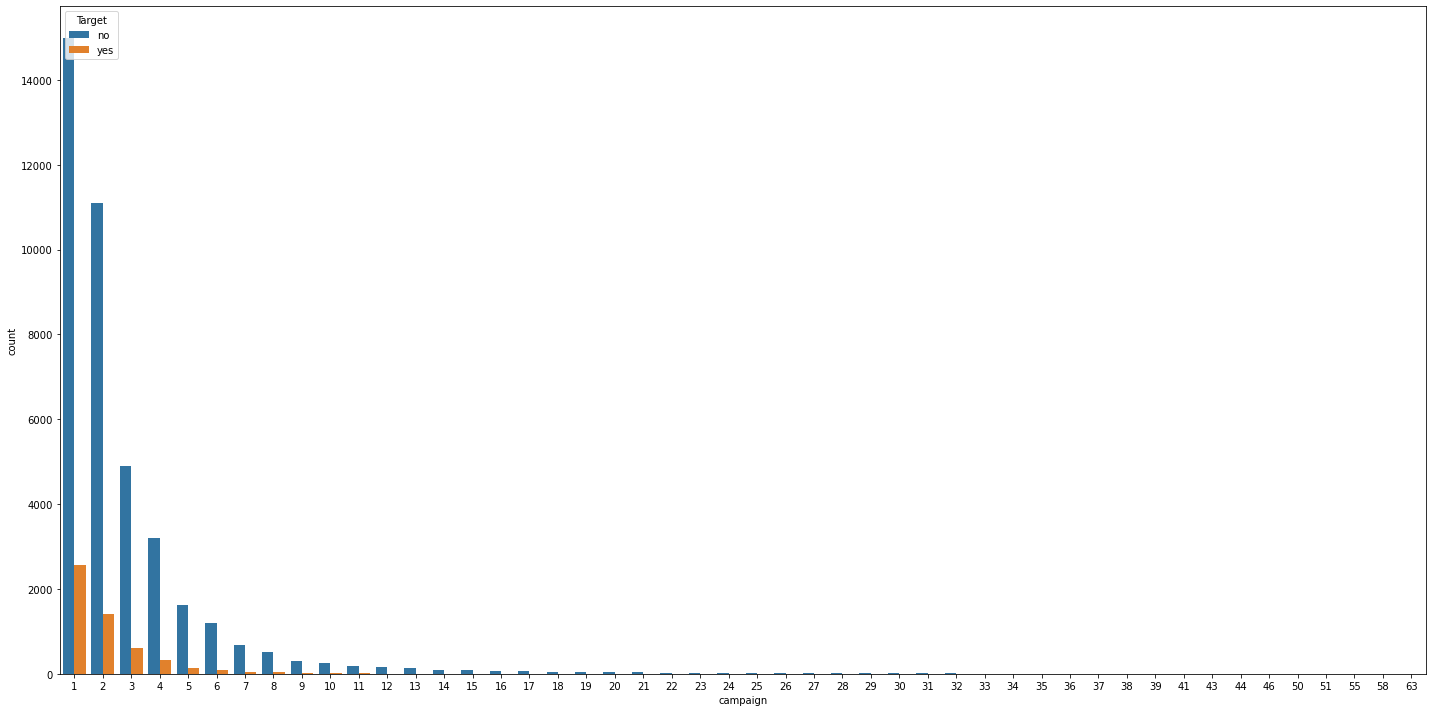

In [48]:
plt.figure(figsize=(20,10))
sns.countplot(BankData.campaign, hue = "Target", data=BankData)
plt.tight_layout()

C:\Users\srisi\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\srisi\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


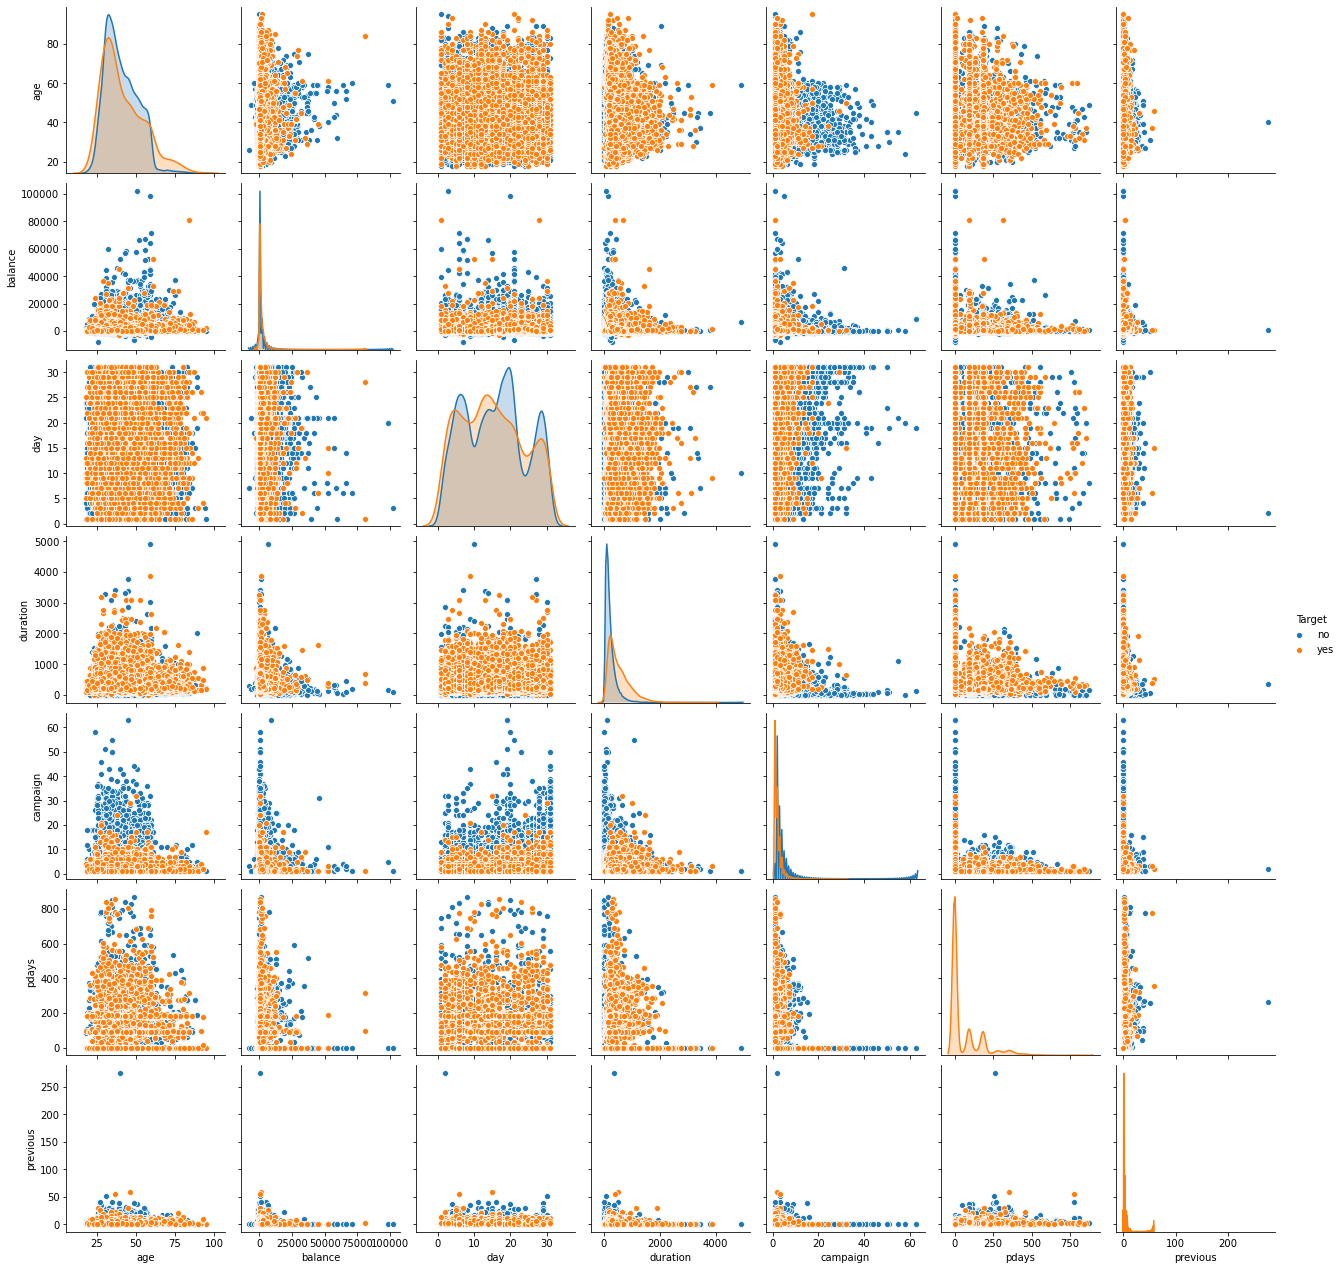

In [49]:
sns.pairplot(BankData,hue = 'Target',diag_kind='kde')

**insights**
High skewness in duration, age, campaign

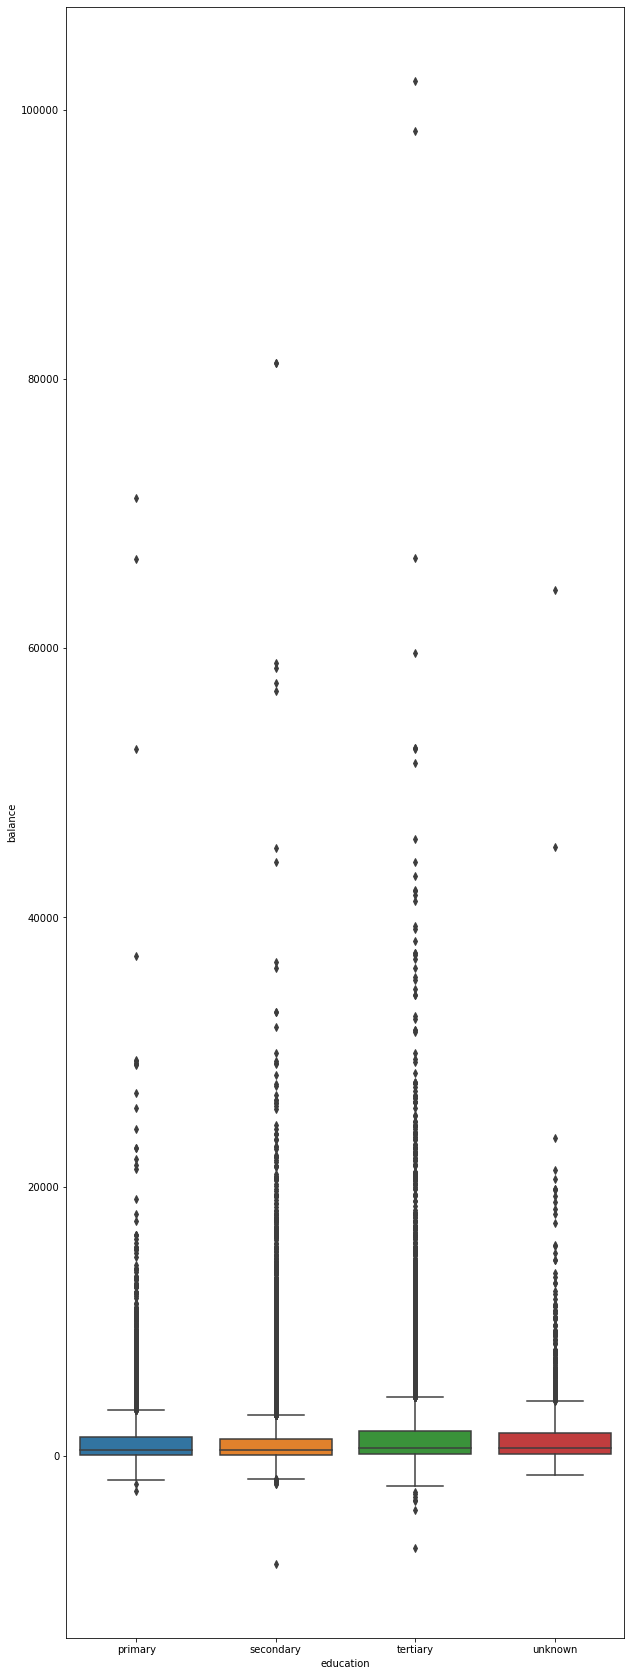

In [50]:
plt.figure(figsize=(10,30))
sns.boxplot(BankData['education'], BankData['balance'])
#plt.tight_layout()

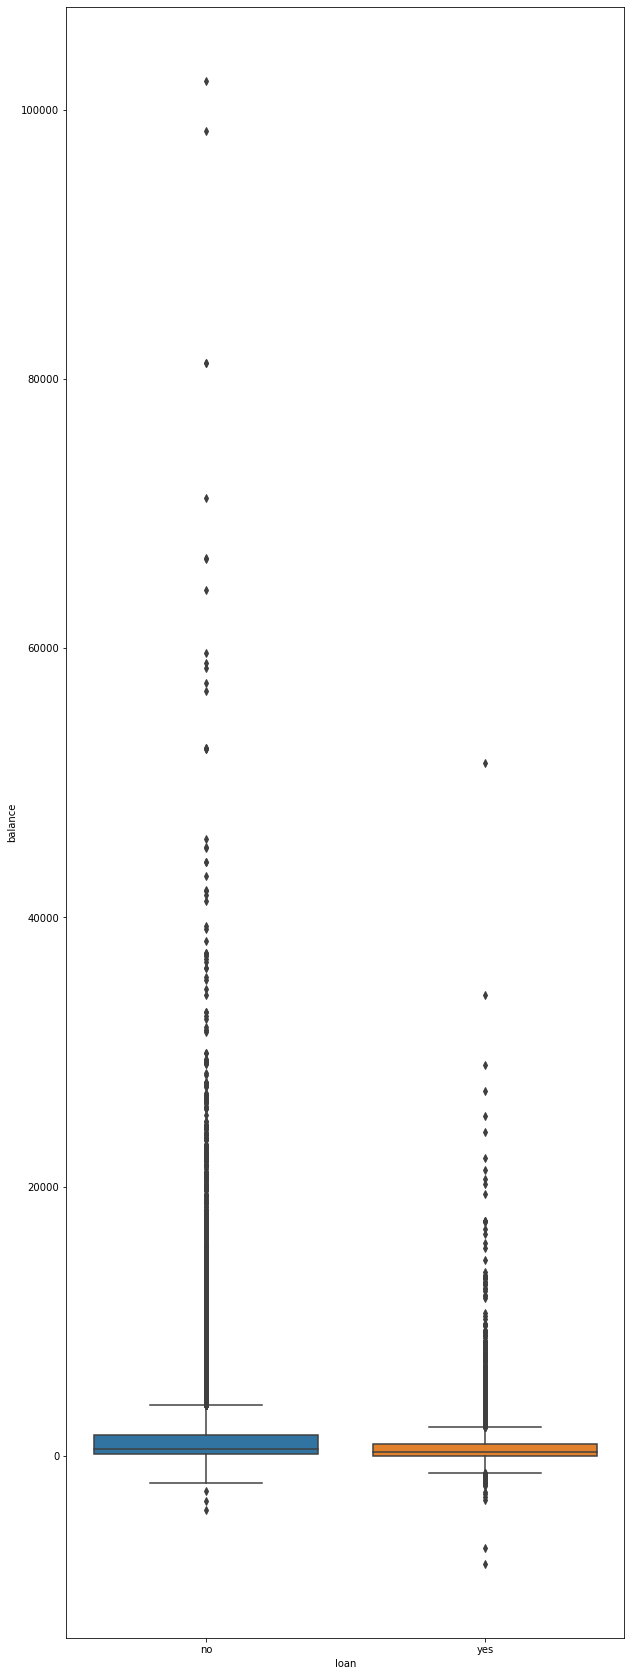

In [51]:
plt.figure(figsize=(10,30))
sns.boxplot(BankData['loan'], BankData['balance'], data = BankData)
plt.show()

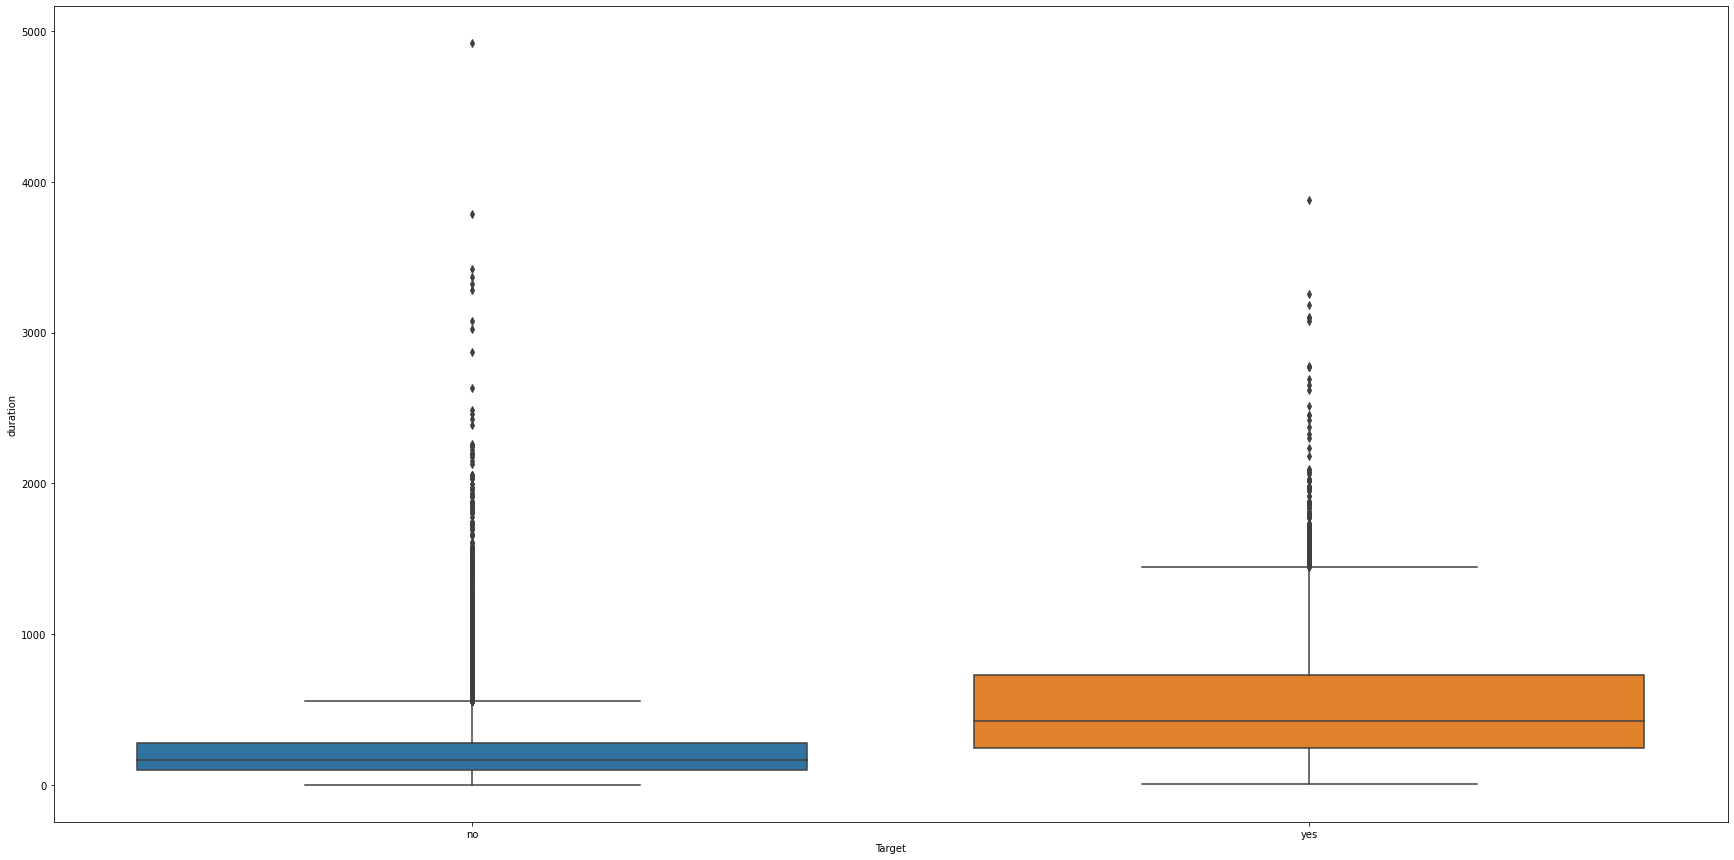

In [52]:
plt.figure(figsize=(30,15))
sns.boxplot(BankData['Target'], BankData['duration'], data=BankData)

plt.show()



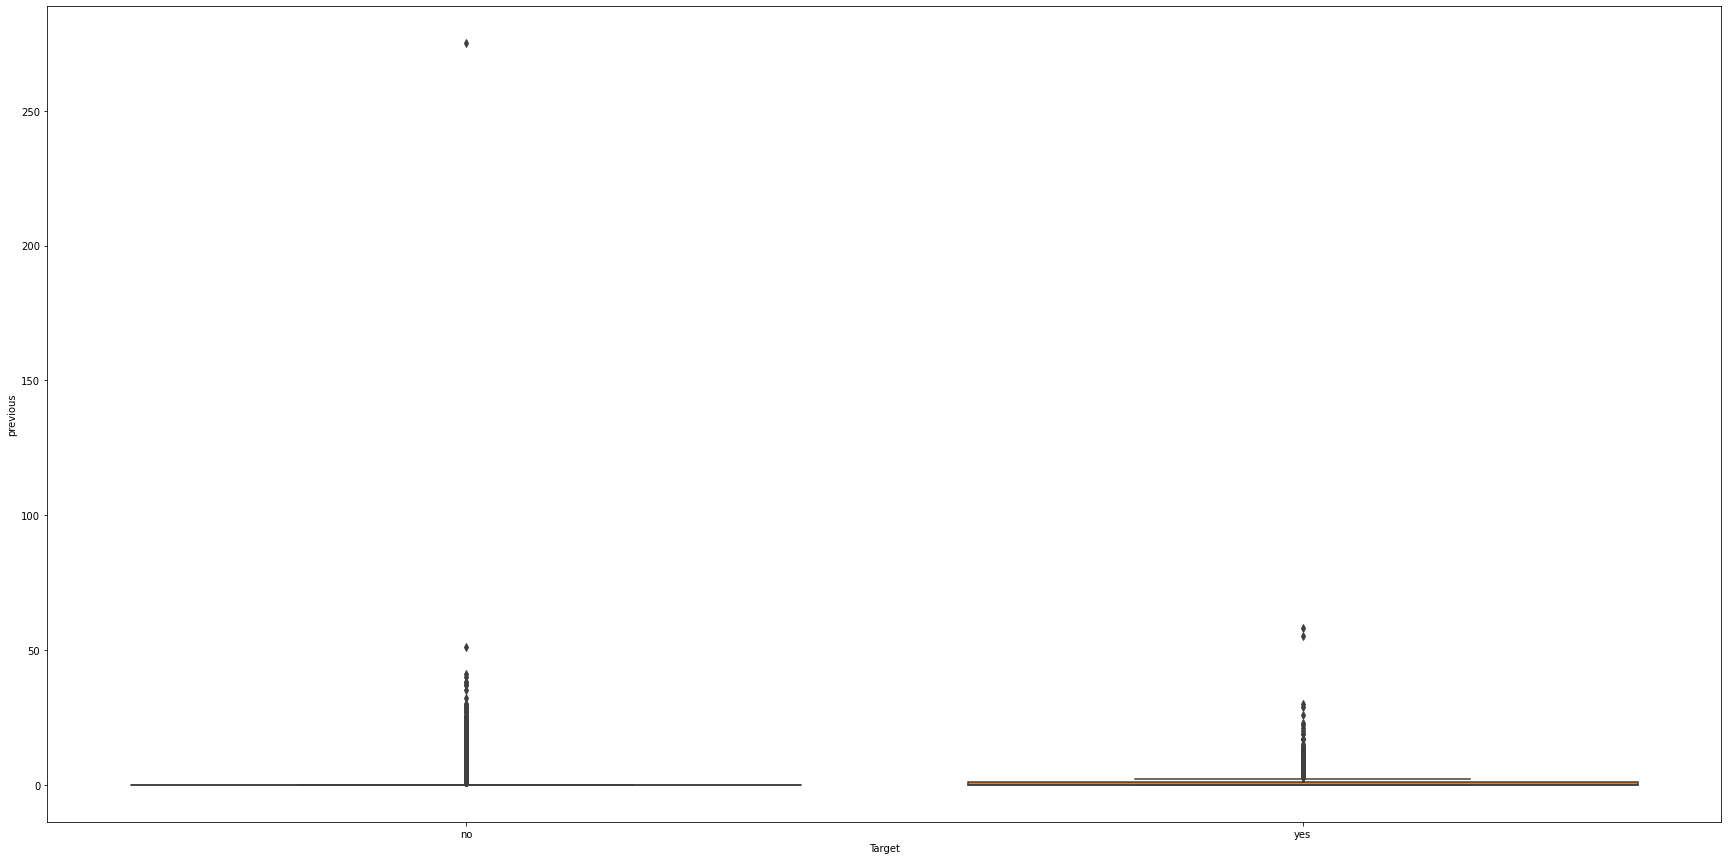

In [53]:
plt.figure(figsize=(30,15))
sns.boxplot(BankData['Target'], BankData['previous'])
plt.show()

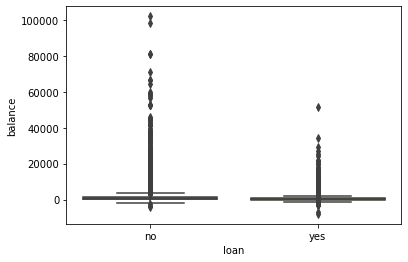

In [54]:
sns.boxplot(BankData['loan'], BankData['balance'], data=BankData)


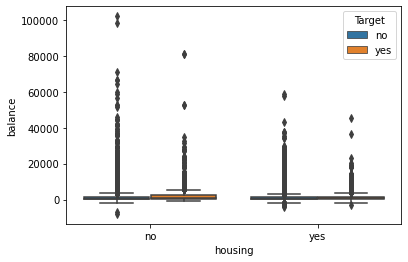

In [55]:
sns.boxplot(BankData['housing'], BankData['balance'], hue = "Target", data=BankData)


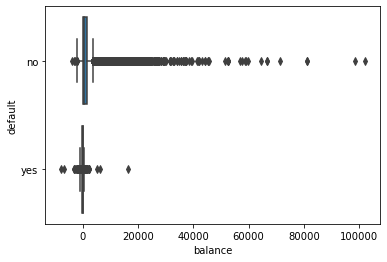

In [56]:
sns.boxplot(BankData['balance'], BankData['default'], data=BankData)


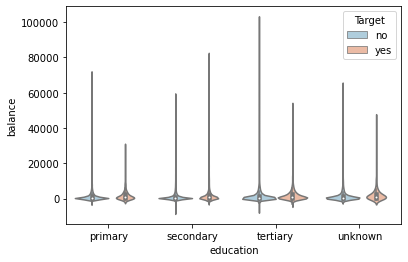

In [57]:
 sns.violinplot(data=BankData, x="education", y="balance", hue="Target", palette="RdBu_r")

Customers with age above 40 havent had credit in default.

Age doesnt have much effect on Target.

Blue collared, management and technician havent subscribed to a term deposit.

Married people havent taken term deposit compared to unmarried and divorced.

Secondary and tertiary has more Nos compared to other.

Housing also has effect on Target.

Default, month, duration, campaign all have effect on Target.

customers with no housing loan has more balance, but hasnt taken term deposit too.
 customers with Teriary education has more balance.
 
 Customers who have been contacted with campaign and cellular have taken term deposit.
 



# Getting Data Ready

In [58]:
newdata = BankData
newdata.groupby(newdata['Target']).mean()


age      balance        day    duration  campaign      pdays  \
Target                                                                       
no      40.838986  1303.714969  15.892290  221.182806  2.846350  36.421372   
yes     41.670070  1804.267915  15.158253  537.294574  2.141047  68.702968   

        previous  
Target            
no      0.502154  
yes     1.170354

In [59]:
newdata.groupby(newdata['Target']).median()

age  balance  day  duration  campaign  pdays  previous
Target                                                        
no       39      417   16       164         2     -1         0
yes      38      733   15       426         2     -1         0

Average age of customers who took term deposit is 41. 
Customers with more balance have taken term deposit.
campaign doesnt have much effect on term deposit. We can drop the column.


In [60]:
pd.crosstab(newdata['education'],newdata['Target'],normalize='index')

Target           no       yes
education                    
primary    0.913735  0.086265
secondary  0.894406  0.105594
tertiary   0.849936  0.150064
unknown    0.864297  0.135703

In [61]:
pd.crosstab(newdata['job'],newdata['Target'],normalize='index')

Target               no       yes
job                              
admin.         0.877973  0.122027
blue-collar    0.927250  0.072750
entrepreneur   0.917283  0.082717
housemaid      0.912097  0.087903
management     0.862444  0.137556
retired        0.772085  0.227915
self-employed  0.881571  0.118429
services       0.911170  0.088830
student        0.713220  0.286780
technician     0.889430  0.110570
unemployed     0.844973  0.155027
unknown        0.881944  0.118056

In [62]:
pd.crosstab(newdata['Target'],newdata['loan'],normalize='index')

loan          no       yes
Target                    
no      0.830670  0.169330
yes     0.908489  0.091511

In [63]:
pd.crosstab(newdata['marital'],newdata['Target'],normalize='index')

Target          no       yes
marital                     
divorced  0.880545  0.119455
married   0.898765  0.101235
single    0.850508  0.149492

In [64]:
pd.crosstab(newdata['month'],newdata['Target'],normalize='index')

Target        no       yes
month                     
apr     0.803206  0.196794
aug     0.889867  0.110133
dec     0.532710  0.467290
feb     0.833522  0.166478
jan     0.898788  0.101212
jul     0.909065  0.090935
jun     0.897772  0.102228
mar     0.480084  0.519916
may     0.932805  0.067195
nov     0.898489  0.101511
oct     0.562331  0.437669
sep     0.535406  0.464594

In [65]:

pd.crosstab(newdata['housing'],newdata['Target'],normalize='index')

Target         no       yes
housing                    
no       0.832976  0.167024
yes      0.923000  0.077000

In [66]:
pd.crosstab(newdata['default'],newdata['Target'],normalize='index')


Target         no       yes
default                    
no       0.882039  0.117961
yes      0.936196  0.063804

In [67]:
pd.crosstab(newdata['loan'],newdata['Target'],normalize='index')


Target        no       yes
loan                      
no      0.873443  0.126557
yes     0.933186  0.066814

In [68]:
newdata['job'] = newdata['job'].replace(['unknown'],'other')
newdata['education'] = newdata['education'].replace(['unknown'],'other')
newdata['poutcome'] =  newdata['poutcome'].replace(['unknown'],'other')
newdata.head()
#converting the unkwnown to other as poutcome has 50% of unknown and cant remove that much huge data.

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married      other      no     1506     yes   no   
4   33         other   single      other      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome Target  
0  unknown    5   may       261         1     -1         0    other     no  
1  unknown    5   may       151         1     -1         0    other     no  
2  unknown    5   may        76         1     -1         0    other     no  
3  unknown    5   may        92         1     -1         0    other     no  
4  unknown    5   may       198         1     -1         0    other     no

In [69]:
cols ={'education','marital'}
newdata=pd.get_dummies(newdata,columns=cols)
newdata
# education and marital columns have effect on the target. Hence normalizing them before splitting data.

age           job default  balance housing loan    contact  day month  \
0       58    management      no     2143     yes   no    unknown    5   may   
1       44    technician      no       29     yes   no    unknown    5   may   
2       33  entrepreneur      no        2     yes  yes    unknown    5   may   
3       47   blue-collar      no     1506     yes   no    unknown    5   may   
4       33         other      no        1      no   no    unknown    5   may   
...    ...           ...     ...      ...     ...  ...        ...  ...   ...   
45206   51    technician      no      825      no   no   cellular   17   nov   
45207   71       retired      no     1729      no   no   cellular   17   nov   
45208   72       retired      no     5715      no   no   cellular   17   nov   
45209   57   blue-collar      no      668      no   no  telephone   17   nov   
45210   37  entrepreneur      no     2971      no   no   cellular   17   nov   

       duration  ...  previous  poutcome  Target education_primary  \
0           261  ...         0     other      no                 0   
1           151  ...         0     other      no                 0   
2            76  ...         0     other      no                 0   
3            92  ...         0     other      no                 0   
4           198  ...         0     other      no                 0   
...         ...  ...       ...       ...     ...               ...   
45206       977  ...         0     other     yes                 0   
45207       456  ...         0     other     yes                 1   
45208      1127  ...         3   success     yes                 0   
45209       508  ...         0     other      no                 0   
45210       361  ...        11     other      no                 0   

      education_secondary  education_tertiary  education_other  \
0                       0                   1                0   
1                       1                   0                0   
2                       1                   0                0   
3                       0                   0                1   
4                       0                   0                1   
...                   ...                 ...              ...   
45206                   0                   1                0   
45207                   0                   0                0   
45208                   1                   0                0   
45209                   1                   0                0   
45210                   1                   0                0   

       marital_divorced  marital_married  marital_single  
0                     0                1               0  
1                     0                0               1  
2                     0                1               0  
3                     0                1               0  
4                     0                0               1  
...                 ...              ...             ...  
45206                 0                1               0  
45207                 1                0               0  
45208                 0                1               0  
45209                 0                1               0  
45210                 0                1               0  

[45211 rows x 22 columns]

# converting into numeric data

In [70]:
#job, age, education, marital, month, contact, poutcome,default

In [71]:
from sklearn.preprocessing import LabelEncoder 
 
    #job, age, education, marital, month, contact, poutcome,default usinf
le = LabelEncoder() 
  
newdata['job']= le.fit_transform(newdata['job']) 
#newdata['education']= le.fit_transform(newdata['education']) 
#newdata['marital']= le.fit_transform(newdata['marital']) 
newdata['contact']= le.fit_transform(newdata['contact'])
newdata['poutcome']= le.fit_transform(newdata['poutcome']) 
newdata['month']= le.fit_transform(newdata['month']) 
newdata['housing']= le.fit_transform(newdata['housing']) 
newdata['loan']= le.fit_transform(newdata['loan']) 
newdata['Target']= le.fit_transform(newdata['Target'])
newdata['default']= le.fit_transform(newdata['default']) 








In [72]:
newdata

age  job  default  balance  housing  loan  contact  day  month  \
0       58    4        0     2143        1     0        2    5      8   
1       44   10        0       29        1     0        2    5      8   
2       33    2        0        2        1     1        2    5      8   
3       47    1        0     1506        1     0        2    5      8   
4       33    5        0        1        0     0        2    5      8   
...    ...  ...      ...      ...      ...   ...      ...  ...    ...   
45206   51   10        0      825        0     0        0   17      9   
45207   71    6        0     1729        0     0        0   17      9   
45208   72    6        0     5715        0     0        0   17      9   
45209   57    1        0      668        0     0        1   17      9   
45210   37    2        0     2971        0     0        0   17      9   

       duration  ...  previous  poutcome  Target  education_primary  \
0           261  ...         0         1       0                  0   
1           151  ...         0         1       0                  0   
2            76  ...         0         1       0                  0   
3            92  ...         0         1       0                  0   
4           198  ...         0         1       0                  0   
...         ...  ...       ...       ...     ...                ...   
45206       977  ...         0         1       1                  0   
45207       456  ...         0         1       1                  1   
45208      1127  ...         3         2       1                  0   
45209       508  ...         0         1       0                  0   
45210       361  ...        11         1       0                  0   

       education_secondary  education_tertiary  education_other  \
0                        0                   1                0   
1                        1                   0                0   
2                        1                   0                0   
3                        0                   0                1   
4                        0                   0                1   
...                    ...                 ...              ...   
45206                    0                   1                0   
45207                    0                   0                0   
45208                    1                   0                0   
45209                    1                   0                0   
45210                    1                   0                0   

       marital_divorced  marital_married  marital_single  
0                     0                1               0  
1                     0                0               1  
2                     0                1               0  
3                     0                1               0  
4                     0                0               1  
...                 ...              ...             ...  
45206                 0                1               0  
45207                 1                0               0  
45208                 0                1               0  
45209                 0                1               0  
45210                 0                1               0  

[45211 rows x 22 columns]

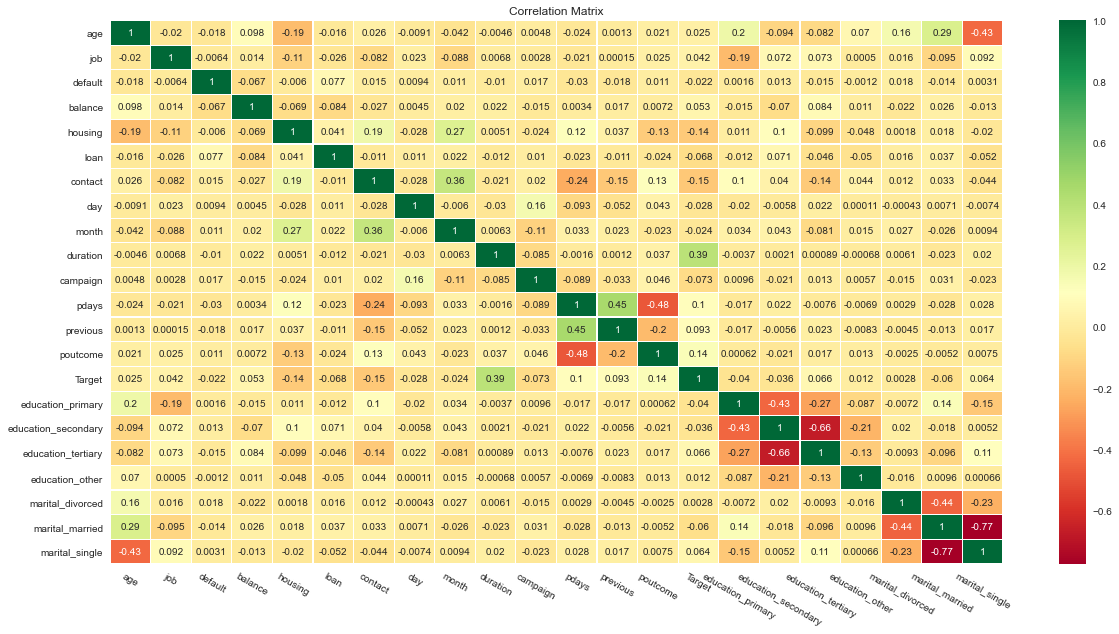

In [117]:
#corr_data = BankData[['age','balance','day','duration','campaign','pdays','month', 'previous','Target']]
corr_data = newdata
corr = corr_data.corr()

cor_plot = sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':10})
fig=plt.gcf()
fig.set_size_inches(20,10)
plt.xticks(fontsize=10,rotation=-30)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix')
plt.show()

pdays ans poutcome have negative correlation.
previous and poutcome also has negative correlation

In [74]:
newdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   job                  45211 non-null  int32
 2   default              45211 non-null  int32
 3   balance              45211 non-null  int64
 4   housing              45211 non-null  int32
 5   loan                 45211 non-null  int32
 6   contact              45211 non-null  int32
 7   day                  45211 non-null  int64
 8   month                45211 non-null  int32
 9   duration             45211 non-null  int64
 10  campaign             45211 non-null  int64
 11  pdays                45211 non-null  int64
 12  previous             45211 non-null  int64
 13  poutcome             45211 non-null  int32
 14  Target               45211 non-null  int32
 15  education_primary    45211 non-null  uint8
 16  education_secondary  4

## Split Data

In [75]:
newdata.head()


age  job  default  balance  housing  loan  contact  day  month  duration  \
0   58    4        0     2143        1     0        2    5      8       261   
1   44   10        0       29        1     0        2    5      8       151   
2   33    2        0        2        1     1        2    5      8        76   
3   47    1        0     1506        1     0        2    5      8        92   
4   33    5        0        1        0     0        2    5      8       198   

   ...  previous  poutcome  Target  education_primary  education_secondary  \
0  ...         0         1       0                  0                    0   
1  ...         0         1       0                  0                    1   
2  ...         0         1       0                  0                    1   
3  ...         0         1       0                  0                    0   
4  ...         0         1       0                  0                    0   

   education_tertiary  education_other  marital_divorced  marital_married  \
0                   1                0                 0                1   
1                   0                0                 0                0   
2                   0                0                 0                1   
3                   0                1                 0                1   
4                   0                1                 0                0   

   marital_single  
0               0  
1               1  
2               0  
3               0  
4               1  

[5 rows x 22 columns]

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression
from yellowbrick.classifier import ClassificationReport, ROCAUC



splitData = newdata.copy()
x = splitData.drop("Target" , axis=1)
y = splitData.pop("Target")


In [77]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.30, random_state=1)
x_train.head()
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(31647, 21)
(13564, 21)
(31647,)
(13564,)


In [78]:
print("{0:0.2f}% data is in training set".format((len(x_train)/len(splitData.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(splitData.index)) * 100))

70.00% data is in training set
30.00% data is in test set


In [79]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

#Normalization 
minmax= MinMaxScaler()
X_train2 = pd.DataFrame(minmax.fit_transform(x_train))
X_test2 = pd.DataFrame(minmax.transform(x_test))


MinMax_X_train = X_train2
MinMax_X_test = X_test2
print("Mimmax scaled train data\n", MinMax_X_train)
print("Mimmax scaled test data\n", MinMax_X_test)

#STANDARD Sclaer: 

stdsc= StandardScaler()
X_train3 = pd.DataFrame(stdsc.fit_transform(x_train))
X_test3 = pd.DataFrame(stdsc.transform(x_test))

StdSc_X_train = X_train3
StdSc_X_test = X_test3

print(StdSc_X_train.shape)
print(StdSc_X_test.shape)

# Will be checking data with and without Standardization and normalization

Mimmax scaled train data
              0         1    2         3    4    5    6         7         8   \
0      0.181818  0.090909  1.0  0.060647  1.0  0.0  1.0  0.866667  0.727273   
1      0.207792  0.000000  0.0  0.058445  1.0  1.0  1.0  0.866667  0.545455   
2      0.181818  0.909091  0.0  0.065272  1.0  0.0  0.0  0.600000  0.090909   
3      0.233766  0.090909  1.0  0.062951  0.0  1.0  0.0  0.066667  0.272727   
4      0.064935  0.818182  0.0  0.067291  0.0  0.0  0.0  0.066667  0.636364   
...         ...       ...  ...       ...  ...  ...  ...       ...       ...   
31642  0.415584  0.909091  0.0  0.079624  0.0  0.0  0.0  0.433333  0.727273   
31643  0.207792  0.363636  0.0  0.067677  1.0  0.0  0.0  0.533333  0.000000   
31644  0.389610  0.363636  0.0  0.101290  0.0  0.0  1.0  0.666667  0.727273   
31645  0.350649  0.000000  0.0  0.079193  0.0  0.0  1.0  0.633333  0.545455   
31646  0.350649  0.090909  0.0  0.066034  1.0  0.0  0.0  0.533333  0.000000   

             9   ...     

In [80]:
from sklearn.preprocessing import Normalizer
from scipy import stats

#Normalization Using Normalizer(): 
norm= Normalizer()
X_train4 = pd.DataFrame(norm.fit_transform(x_train))
X_test4 = pd.DataFrame(norm.transform(x_test))

Norm_X_train = X_train4
Norm_X_test = X_test4

In [81]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression

# Fit the model on train without the scaling
model_nonscalar = LogisticRegression(solver="liblinear")
model_nonscalar.fit(x_train, y_train)
#predict on test
y_predict_logit = model_nonscalar.predict(x_test)


coef_df = pd.DataFrame(model_nonscalar.coef_)
coef_df['intercept'] = model_nonscalar.intercept_
print(coef_df)

          0         1         2         3         4         5         6  \
0  0.008625  0.004674 -0.344383  0.000019 -0.940968 -0.591905 -0.609406   

          7         8         9  ...        12       13        14        15  \
0 -0.007815  0.038687  0.004049  ...  0.068367  1.17165 -0.934165 -0.680281   

         16        17        18        19        20  intercept  
0 -0.476326 -0.526372 -0.938797 -1.032518 -0.645828  -2.617143  

[1 rows x 22 columns]


In [82]:
model_nonscalar_score = model_nonscalar.score(x_test, y_test)
print(model_nonscalar_score)

0.8984812739604836


In [118]:
# Fit the model on train using scaled data.
model_scalar = LogisticRegression(solver="liblinear")
model_scalar.fit(MinMax_X_train, y_train)
#predict on test
MinMax_y_predict = model_scalar.predict(MinMax_X_test)


model_scalar_score = model_scalar.score(MinMax_X_test, y_test)
print(model_scalar_score)
print(recall_score(y_test,y_predict_logit))

0.8986287230905338
0.2927143778207608


In [84]:
# Fit the model on train using scaled data.
StdSc_model_scalar = LogisticRegression(solver="liblinear")
StdSc_model_scalar.fit(StdSc_X_train, y_train)
#predict on test
Stdsc_y_predict = StdSc_model_scalar.predict(StdSc_X_test)

StdSc_model_scalar_Score_train =  StdSc_model_scalar.score(Norm_X_train, y_train)
print(StdSc_model_scalar_Score_train)
StdSc_model_scalar_Score = StdSc_model_scalar.score(StdSc_X_test, y_test)
print(StdSc_model_scalar_Score)

0.8818845388188454
0.8981863757003834


In [85]:
# Fit the model on train using normalized data.
Norm_model_scalar = LogisticRegression(solver="liblinear")
Norm_model_scalar.fit(Norm_X_train, y_train)
#predict on test
Norm_y_predict = Norm_model_scalar.predict(Norm_X_test)

Norm_model_scalar_Score_train =  Norm_model_scalar.score(Norm_X_train, y_train)
print(Norm_model_scalar_Score_train)
Norm_model_scalar_Score = Norm_model_scalar.score(Norm_X_test, y_test)
print(Norm_model_scalar_Score)

0.8830852845451386
0.8853583013860218


**Insights **

**Comparing the scores with scaling and without, it shows that there is not much difference between the accuracy score.
Hence going ahead with normal data to check various ensemble techniques.

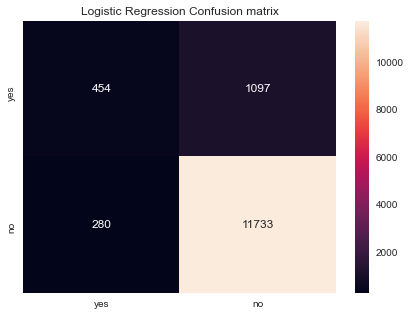

In [86]:
cm=metrics.confusion_matrix(y_test, y_predict_logit, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["yes","no"]],
                  columns = [i for i in ["yes","no"]])
plt.figure(figsize = (7,5))
plt.title("Logistic Regression Confusion matrix")
sns.heatmap(df_cm,fmt='g', annot=True)

**insights**
True Positive - 454
true negative - 278
False poistive - 11735
false negative - 1097

In [87]:
#Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.DataFrame({'Method':['Logistic Regression'],
                          'Trainig accuracy': model_nonscalar.score(x_train,y_train), 
                          'Testing Accuracy':model_nonscalar.score(x_test,y_test),
                         'Recall' : recall_score(y_test,y_predict_logit) ,
                          'precision' : precision_score(y_test,y_predict_logit), 
                          'F1 Score': f1_score(y_test,y_predict_logit),
                         'ROC AUC Score': roc_auc_score(y_test,y_predict_logit)})
resultsDf = resultsDf[['Method', 'Trainig accuracy', 'Testing Accuracy', 'Recall', 'precision','F1 Score','ROC AUC Score']]
resultsDf

Method  Trainig accuracy  Testing Accuracy    Recall  \
0  Logistic Regression          0.898411          0.898481  0.292714   

   precision  F1 Score  ROC AUC Score  
0   0.618529  0.397374       0.634703

C:\Users\srisi\anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '
C:\Users\srisi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


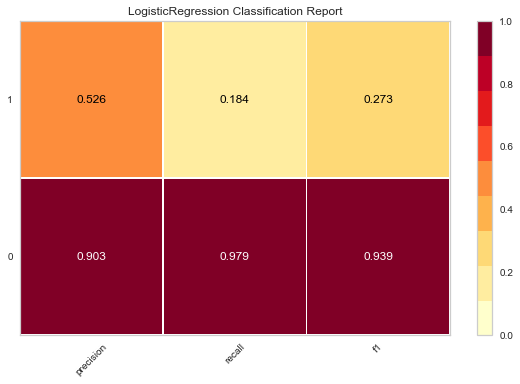

In [88]:
visualizer = ClassificationReport(LogisticRegression())

visualizer.fit(x_train, y_train)        # Fit the visualizer and the model
visualizer.score(x_test, y_test)        # Evaluate the model on the test data
visualizer.show()  

** insights **
1. Training and Testing accuracy is 89%
2. recall is .29
3. w.r.t classification report, precision , recall and f1 are higher for Nos then Yes.


## DecisionTree Model

In [89]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(x_train, y_train)
print(dTree.score(x_train, y_train))
print(dTree.score(x_test, y_test))

1.0
0.8763639044529637


In [90]:
train_char_label = ['No', 'Yes']
Credit_Tree_File = open('deposit_tree.dot','w')
dot_data = tree.export_graphviz(dTree, out_file=Credit_Tree_File, feature_names = list(x_train), class_names = list(train_char_label))
Credit_Tree_File.close()

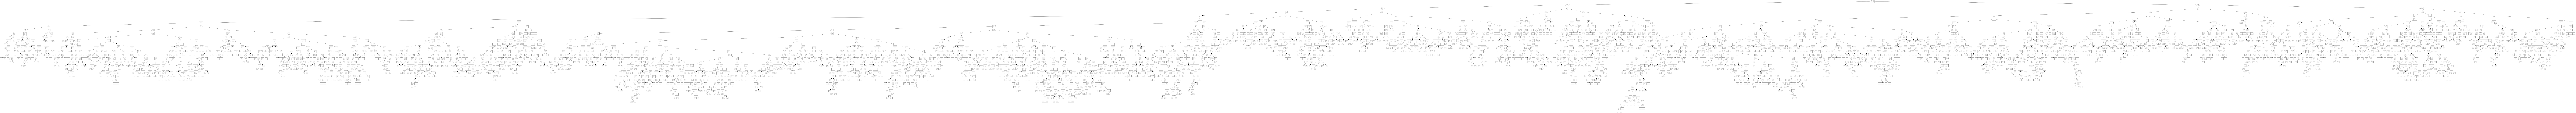

In [91]:
retCode = system("dot -Tpng deposit_tree.dot -o deposit_tree.png")
if(retCode>0):
    print("system command returning error: "+str(retCode))
else:
    display(Image("deposit_tree.png"))

In [92]:
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 4, random_state=1)
dTreeR.fit(x_train, y_train)
print(dTreeR.score(x_train, y_train))
print(dTreeR.score(x_test, y_test))

0.9012544632982589
0.9015039811265113


**insights**
Decision Tree went overfitting. Hence pruning the tree to max_depth of 4.
Accuracy has been increased from 87% to 90% after pruning the data.


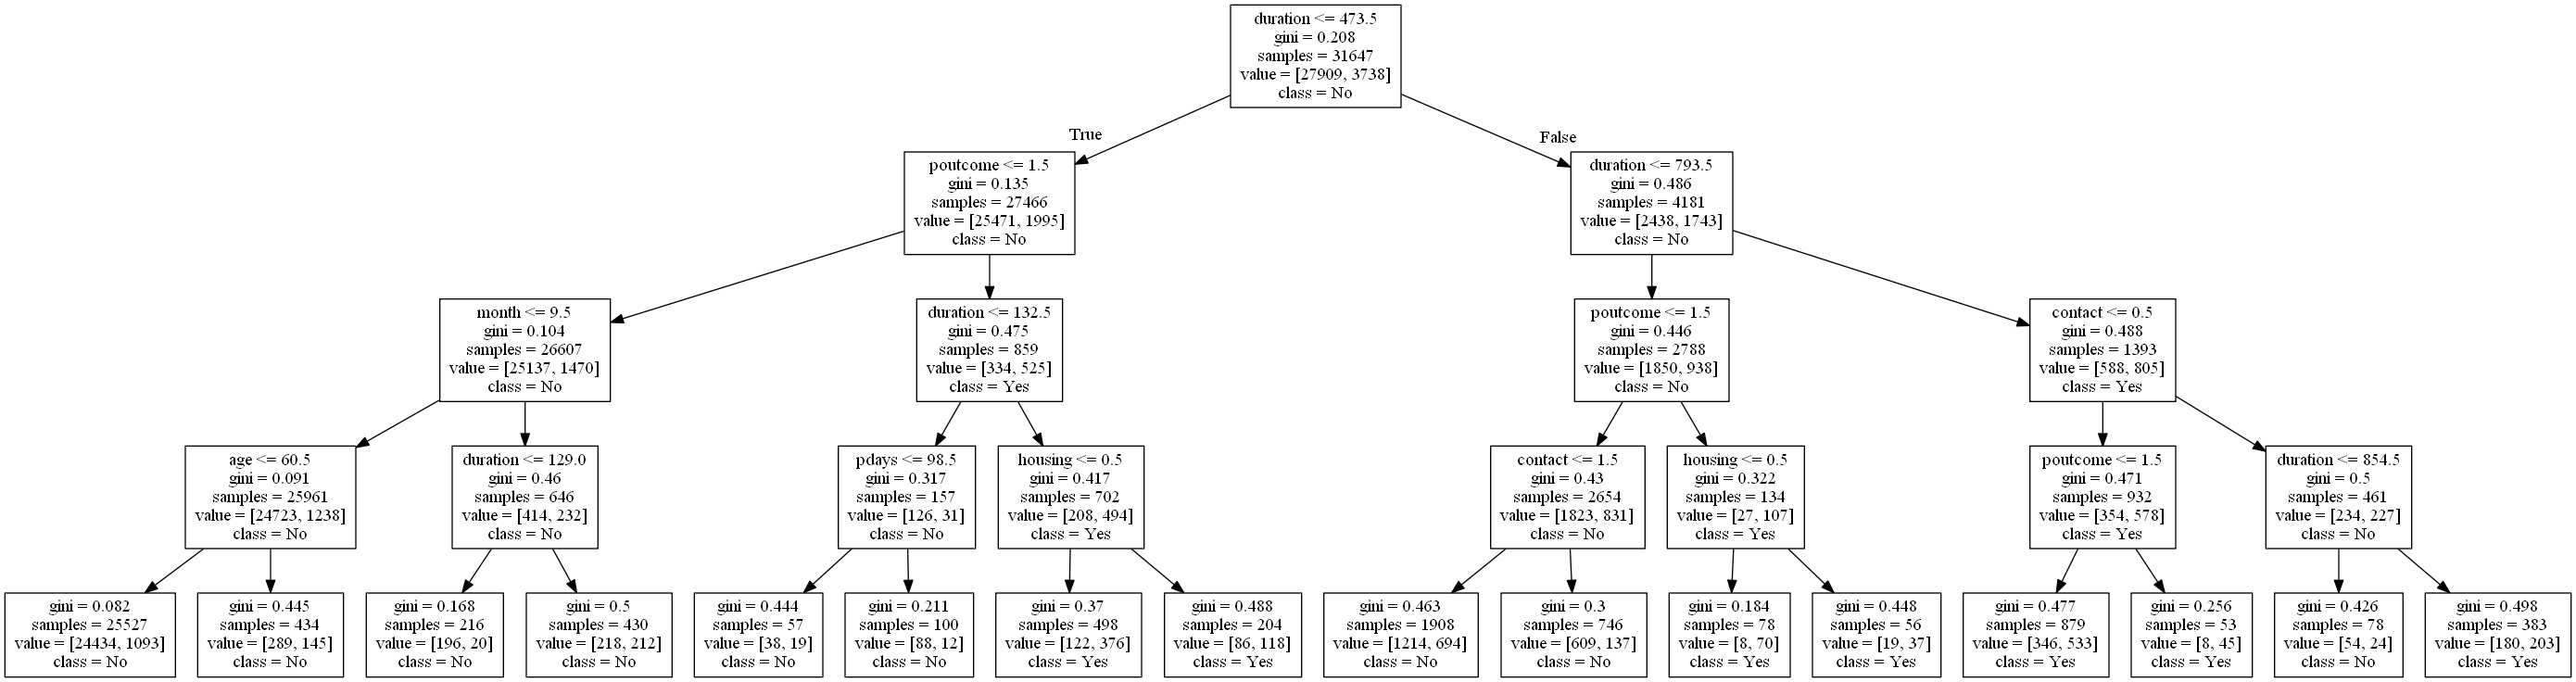

In [93]:
train_char_label = ['No', 'Yes']
Credit_Tree_FileR = open('deposit_treeR.dot','w')
dot_data = tree.export_graphviz(dTreeR, out_file=Credit_Tree_FileR, feature_names = list(x_train), class_names = list(train_char_label))
Credit_Tree_FileR.close()

#Works only if "dot" command works on you machine

retCode = system("dot -Tpng deposit_treeR.dot -o deposit_treeR.png")
if(retCode>0):
    print("system command returning error: "+str(retCode))
else:
    display(Image("deposit_treeR.png"))

In [94]:
print (pd.DataFrame(dTreeR.feature_importances_, columns = ["Imp"], index = x_train.columns)) #gnini importance

                          Imp
age                  0.037667
job                  0.000000
default              0.000000
balance              0.000000
housing              0.006595
loan                 0.000000
contact              0.023332
day                  0.000000
month                0.063604
duration             0.565214
campaign             0.000000
pdays                0.001719
previous             0.000000
poutcome             0.301869
education_primary    0.000000
education_secondary  0.000000
education_tertiary   0.000000
education_other      0.000000
marital_divorced     0.000000
marital_married      0.000000
marital_single       0.000000


0.9015039811265113


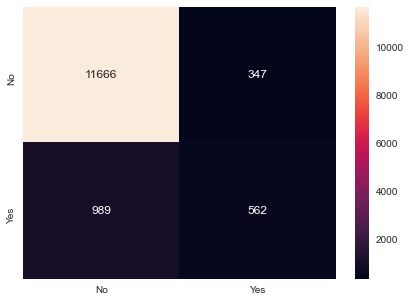

In [95]:
print(dTreeR.score(x_test , y_test))
y_predict_dTreeR = dTreeR.predict(x_test)

cm=metrics.confusion_matrix(y_test, y_predict_dTreeR, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')


In [96]:
tempResultsDf = pd.DataFrame({'Method':['Decision Tree'],
                          'Trainig accuracy': dTreeR.score(x_train,y_train), 
                          'Testing Accuracy':dTreeR.score(x_test,y_test),
                         'Recall' : recall_score(y_test,y_predict_dTreeR) ,
                          'precision' : precision_score(y_test,y_predict_dTreeR), 
                          'F1 Score': f1_score(y_test,y_predict_dTreeR),
                         'ROC AUC Score': roc_auc_score(y_test,y_predict_dTreeR)})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'Trainig accuracy', 'Testing Accuracy', 'Recall', 'precision','F1 Score','ROC AUC Score']]
resultsDf

Method  Trainig accuracy  Testing Accuracy    Recall  \
0  Logistic Regression          0.898411          0.898481  0.292714   
0        Decision Tree          0.901254          0.901504  0.362347   

   precision  F1 Score  ROC AUC Score  
0   0.618529  0.397374       0.634703  
0   0.618262  0.456911       0.666731

**insights**

Accuracy, Recall,precision , F1 score and ROC AUC Score, all are giving better % with decision tree compared to Logistic regression.
Hence decision tree is a better model so far for the given data.

C:\Users\srisi\anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


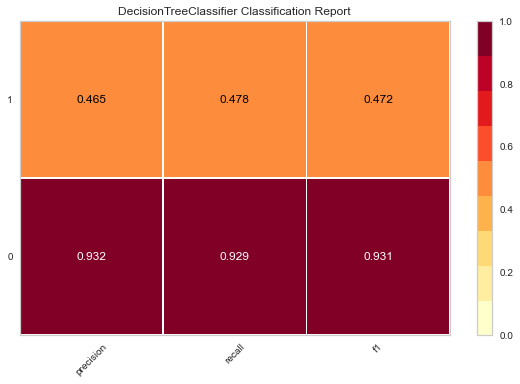

In [97]:
visualizer = ClassificationReport(DecisionTreeClassifier())

visualizer.fit(x_train, y_train)        # Fit the visualizer and the model
visualizer.score(x_test, y_test)        # Evaluate the model on the test data
visualizer.show()  

## Bagging 

In [98]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=dTree, n_estimators=50,random_state=1)
#bgcl = BaggingClassifier(n_estimators=50,random_state=1)

bgcl = bgcl.fit(x_train, y_train)

0.9054851076378649


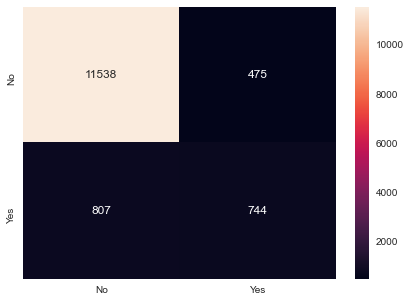

In [99]:
y_predict_bgcl = bgcl.predict(x_test)

print(bgcl.score(x_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict_bgcl,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [100]:
tempResultsDf = pd.DataFrame({'Method':[' Bagging'],
                          'Trainig accuracy': bgcl.score(x_train,y_train), 
                          'Testing Accuracy':bgcl.score(x_test,y_test),
                         'Recall' : recall_score(y_test,y_predict_bgcl) ,
                          'precision' : precision_score(y_test,y_predict_bgcl), 
                          'F1 Score': f1_score(y_test,y_predict_bgcl),
                         'ROC AUC Score': roc_auc_score(y_test,y_predict_bgcl)})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'Trainig accuracy', 'Testing Accuracy', 'Recall', 'precision','F1 Score','ROC AUC Score']]
resultsDf

Method  Trainig accuracy  Testing Accuracy    Recall  \
0  Logistic Regression          0.898411          0.898481  0.292714   
0        Decision Tree          0.901254          0.901504  0.362347   
0              Bagging          0.999747          0.905485  0.479691   

   precision  F1 Score  ROC AUC Score  
0   0.618529  0.397374       0.634703  
0   0.618262  0.456911       0.666731  
0   0.610336  0.537184       0.720075

C:\Users\srisi\anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


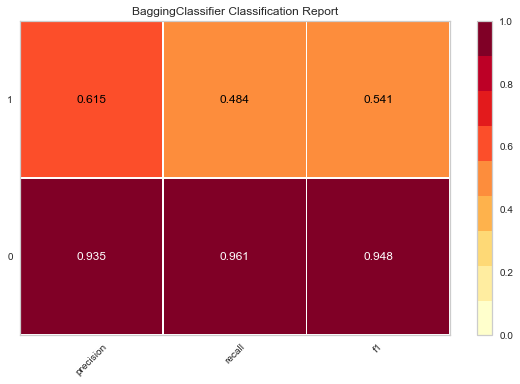

In [101]:
visualizer = ClassificationReport(BaggingClassifier(n_estimators = 50))

visualizer.fit(x_train, y_train)        # Fit the visualizer and the model
visualizer.score(x_test, y_test)        # Evaluate the model on the test data
visualizer.show()  

## AdaBoosting

In [102]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators=10, random_state=1)
#abcl = AdaBoostClassifier( n_estimators=50,random_state=1)
abcl = abcl.fit(x_train, y_train)

0.8979652020053082


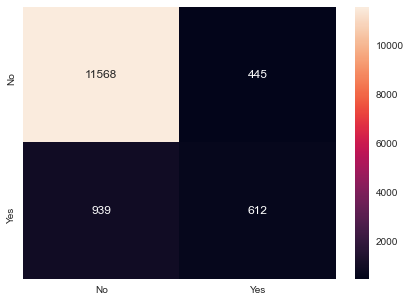

In [103]:
y_predict_abcl = abcl.predict(x_test)
print(abcl.score(x_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict_abcl,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [104]:
tempResultsDf = pd.DataFrame({'Method':['AdaBoost'],
                          'Trainig accuracy': abcl.score(x_train,y_train), 
                          'Testing Accuracy':abcl.score(x_test,y_test),
                         'Recall' : recall_score(y_test,y_predict_abcl) ,
                          'precision' : precision_score(y_test,y_predict_abcl), 
                          'F1 Score': f1_score(y_test,y_predict_abcl),
                         'ROC AUC Score': roc_auc_score(y_test,y_predict_abcl)})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'Trainig accuracy', 'Testing Accuracy', 'Recall', 'precision','F1 Score','ROC AUC Score']]
resultsDf

Method  Trainig accuracy  Testing Accuracy    Recall  \
0  Logistic Regression          0.898411          0.898481  0.292714   
0        Decision Tree          0.901254          0.901504  0.362347   
0              Bagging          0.999747          0.905485  0.479691   
0             AdaBoost          0.897147          0.897965  0.394584   

   precision  F1 Score  ROC AUC Score  
0   0.618529  0.397374       0.634703  
0   0.618262  0.456911       0.666731  
0   0.610336  0.537184       0.720075  
0   0.578997  0.469325       0.678770

C:\Users\srisi\anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


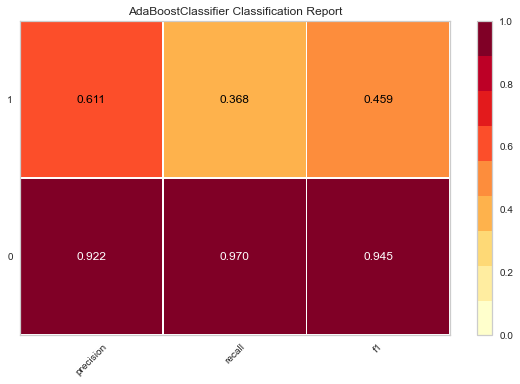

In [105]:
visualizer = ClassificationReport(AdaBoostClassifier(n_estimators = 50))

visualizer.fit(x_train, y_train)        # Fit the visualizer and the model
visualizer.score(x_test, y_test)        # Evaluate the model on the test data
visualizer.show()  

## Gradient Boosting

In [106]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(x_train, y_train)

0.9054851076378649


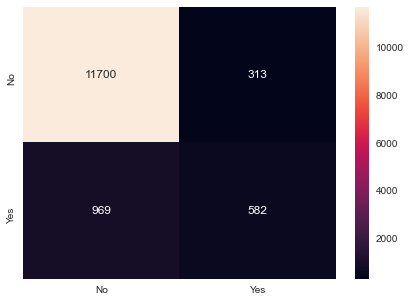

In [107]:
y_predict_gbcl = gbcl.predict(x_test)
print(gbcl.score(x_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict_gbcl,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [108]:
tempResultsDf = pd.DataFrame({'Method':['Gradient boosting'],
                          'Trainig accuracy': gbcl.score(x_train,y_train), 
                          'Testing Accuracy':gbcl.score(x_test,y_test),
                         'Recall' : recall_score(y_test,y_predict_gbcl) ,
                          'precision' : precision_score(y_test,y_predict_gbcl), 
                          'F1 Score': f1_score(y_test,y_predict_gbcl),
                         'ROC AUC Score': roc_auc_score(y_test,y_predict_gbcl)})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'Trainig accuracy', 'Testing Accuracy', 'Recall', 'precision','F1 Score','ROC AUC Score']]
resultsDf

Method  Trainig accuracy  Testing Accuracy    Recall  \
0  Logistic Regression          0.898411          0.898481  0.292714   
0        Decision Tree          0.901254          0.901504  0.362347   
0              Bagging          0.999747          0.905485  0.479691   
0             AdaBoost          0.897147          0.897965  0.394584   
0    Gradient boosting          0.907385          0.905485  0.375242   

   precision  F1 Score  ROC AUC Score  
0   0.618529  0.397374       0.634703  
0   0.618262  0.456911       0.666731  
0   0.610336  0.537184       0.720075  
0   0.578997  0.469325       0.678770  
0   0.650279  0.475879       0.674593

C:\Users\srisi\anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


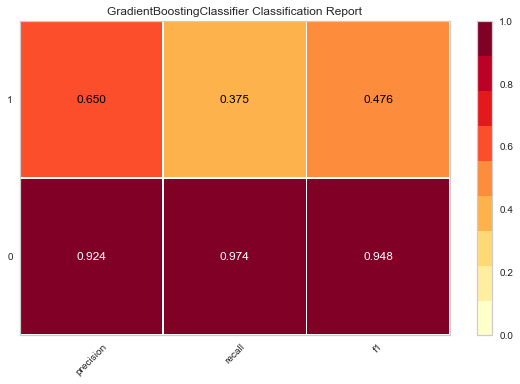

In [109]:
visualizer = ClassificationReport(GradientBoostingClassifier(n_estimators = 50))

visualizer.fit(x_train, y_train)        # Fit the visualizer and the model
visualizer.score(x_test, y_test)        # Evaluate the model on the test data
visualizer.show()  

## Random Forest classifier

In [110]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12)
rfcl = rfcl.fit(x_train, y_train)


0.9056325567679151


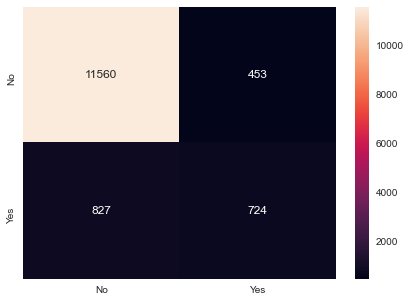

In [111]:
y_predict_rfcl = rfcl.predict(x_test)
print(rfcl.score(x_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict_rfcl,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [112]:
tempResultsDf = pd.DataFrame({'Method':['RandomForest'],
                          'Trainig accuracy': rfcl.score(x_train,y_train), 
                          'Testing Accuracy':rfcl.score(x_test,y_test),
                         'Recall' : recall_score(y_test,y_predict_rfcl) ,
                          'precision' : precision_score(y_test,y_predict_rfcl), 
                          'F1 Score': f1_score(y_test,y_predict_rfcl),
                         'ROC AUC Score': roc_auc_score(y_test,y_predict_rfcl)})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'Trainig accuracy', 'Testing Accuracy', 'Recall', 'precision','F1 Score','ROC AUC Score']]
resultsDf

Method  Trainig accuracy  Testing Accuracy    Recall  \
0  Logistic Regression          0.898411          0.898481  0.292714   
0        Decision Tree          0.901254          0.901504  0.362347   
0              Bagging          0.999747          0.905485  0.479691   
0             AdaBoost          0.897147          0.897965  0.394584   
0    Gradient boosting          0.907385          0.905485  0.375242   
0         RandomForest          0.999842          0.905633  0.466796   

   precision  F1 Score  ROC AUC Score  
0   0.618529  0.397374       0.634703  
0   0.618262  0.456911       0.666731  
0   0.610336  0.537184       0.720075  
0   0.578997  0.469325       0.678770  
0   0.650279  0.475879       0.674593  
0   0.615123  0.530792       0.714543

**insights**
Looking at the DataFrame with all the metrics from different classifiers, We can see that decision tree,bagging, randoom Forest and gradient boosting have almost 90% accuracy. 

w.r.t confusion matrix, gradient boosting TPs values slightly higher than randomForest.

Bagging has higher Recall than others.

Adaboost has lower precision value than other techniques, but its Recall value is very low.

Bagging had F1 score better compared to others.

BAgging and Random Forest almost has higher ROC AUC score and hence in the below graph also their curves are towards left corner and hence their positive rate is good.

After looking at confusion matrix, classification report and the above dataframe and Roc curve,
"Bagging" and "random forest "seems to fair well than other classifiers. 
It has 90% testing accuracy, lower precision. But it still has lower recall and F1 score. 
Might need to see if there is a way to increase these 2 metrics.

W.r.t current scenario, its better to hav recall value a bit higher so that it will increase the chances of classifying customers who aren't intereted in FD and so it will increase the chances of covering all customer who will be ineterested in FD.



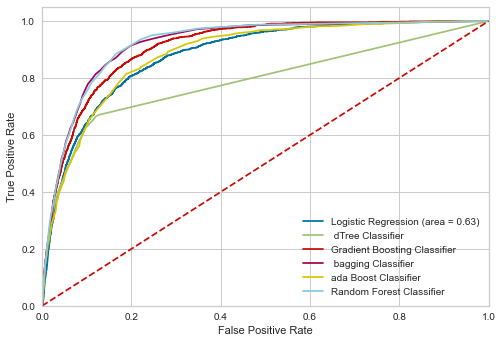

In [113]:
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, model_nonscalar.predict(x_test))
dtree_roc_auc = roc_auc_score(y_test, dTreeR.predict(x_test))
grd_roc_auc = roc_auc_score(y_test, gbcl.predict(x_test))
bgcl_roc_auc = roc_auc_score(y_test, bgcl.predict(x_test))
abcl_roc_auc = roc_auc_score(y_test,abcl.predict(x_test))
rfcl_roc_auc = roc_auc_score(y_test,rfcl.predict(x_test))

fpr, tpr, thresholds = roc_curve(y_test, model_nonscalar.predict_proba(x_test)[:,1])
dt_fpr,dt_tpr,thresholds = roc_curve(y_test, dTreeR.predict_proba(x_test)[:,1])
grd_fpr,grd_tpr,thresholds = roc_curve(y_test,gbcl.predict_proba(x_test)[:,1])
bgcl_fpr,bgcl_tpr,thresholds = roc_curve(y_test,bgcl.predict_proba(x_test)[:,1])
abcl_fpr,abcl_tpr,thresholds = roc_curve(y_test,abcl.predict_proba(x_test)[:,1])
rfcl_fpr,rfcl_tpr,thresholds = roc_curve(y_test,rfcl.predict_proba(x_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(dt_fpr, dt_tpr, label=' dTree Classifier' % dtree_roc_auc)
plt.plot(grd_fpr, grd_tpr, label='Gradient Boosting Classifier' % grd_roc_auc)
plt.plot(bgcl_fpr, bgcl_tpr, label=' bagging Classifier' % bgcl_roc_auc)
plt.plot(abcl_fpr, abcl_tpr, label='ada Boost Classifier' % abcl_roc_auc)
plt.plot(rfcl_fpr, rfcl_tpr, label='Random Forest Classifier' % rfcl_roc_auc)



plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.savefig('ROC')
plt.show()

**insights**
 FRom the above Roc curve graph, it indicates that Random Forest and bagging Classifier has predicted more True Positives than other techniques.

0.9054851076378649


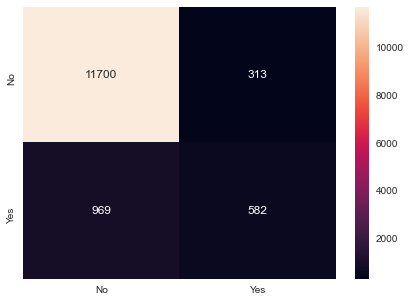

In [114]:

# gradient boosting on scaled data.

from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(MinMax_X_train, y_train)

y_predict_gbcl = gbcl.predict(MinMax_X_test)
print(gbcl.score(MinMax_X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict_gbcl,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

C:\Users\srisi\anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


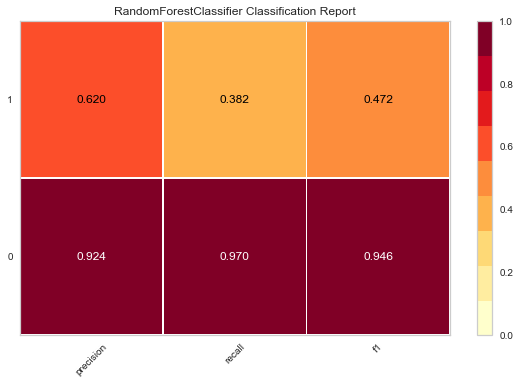

In [115]:
#on scaled data.
visualizer = ClassificationReport(RandomForestClassifier(n_estimators = 50))

visualizer.fit(x_train, y_train)        # Fit the visualizer and the model
visualizer.score(x_test, y_test)        # Evaluate the model on the test data
visualizer.show()   

NameError: name 'X_train' is not defined